# Average Suicide Rates in Females Aged 15-24 Over Time
Alinah Premji

## Overview

### What Problem Did I Solve?

* My original goal was to calcuate and then plot the average rate (per 100k) of suicide among females aged 15-24 against the year in order to see if suicides have increased/decreased for this particular demographic over time
* I have seen a lot of information online about suicide rates in general, but none that focused on specifically young females (using that terminology because I am unsure as to whether the data set includes all women or is based on only sex)
* I believed that the rise of social media would increase suicides in young girls/women

### Where Is the Information From?

* I collected my information from a csv that had already been designed by someone also interested in this topic
* The site is called Kaggle, and it functions to provide open data
* However, because the data was uploaded by an individual, I did ensure that it was reliable by checking the original sources. The data on suicide rates specifically came from an additional dataset that cited the World Health Organization
> This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

## Result

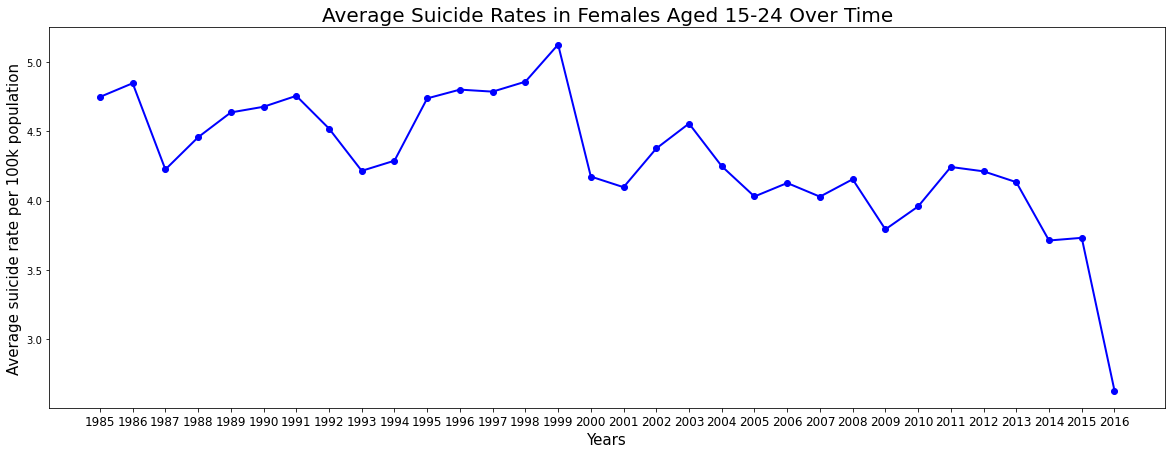

In [32]:
primary = "/Users/alinah/Documents/School/Old/First year Uni/Term 2/Cpsc 103/CSV files/primary_source.csv"
main(primary)

* As a separate note, I realized that the data from 2016 appears to be an outlier so I investigated this and found that the csv file provides less data for the year 2016. However, I elected to keep the data in the graph because the given value does represent the average of all countries that chose to participate, even if the amount of contributing regions was lower

## Code

In [ ]:
from cs103 import *
from typing import NamedTuple, List
from enum import Enum
import csv

###########
# Data Definitions

# List[int]
# interp. a list of integers
LOI0 = []
LOI1 = [1, -12]

# template based on arbitrary-sized data
@typecheck
def fn_for_loi(loi: List[int]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for i in loi:
        acc = ...(i, acc)
        
    return ...(acc)


# List[float] 
# interp. a list of numbers
LOF1 = []
LOF2 = [1, 2, 3, 4]
LOF3 = [-2, 3.4, 7, -22.3]

# template based on arbitrary-sized
@typecheck
def fn_for_lof(lof: List[float]) -> ...:
    # description of the acc
    acc = ... # type:
    for f in lof:
        acc = ...(f, acc)
    return ...(acc)


Sex = Enum('Sex', ["male", "female"])
# interp. someone's sex as being either male or female
# examples are redundant for enumerations

@typecheck
def fn_for_sex(sx: Sex) -> ...:  # template from enumeration (2 fields)  
    if sx == Sex.male:                 
        return ...
    elif sx == Sex.female:
        return ...
           
           
AgeRange = Enum('AgeRange', ["five_to_fourteen", "fifteen_to_twentyfour", "twentyfive_to_thirtyfour", 
                             "thirtyfive_to_fiftyfour", "fiftyfive_to_seventyfour", "seventyfive_plus",])
# interp. an age category as being one of six cases: 5-14 years, 15-24 years, 25-34 years, 35-54 years, 
# 55-74 years, and 75+ years
# examples are redundant for enumerations

@typecheck
def fn_for_age_range(ar: AgeRange) -> ...:  # template from enumeration (6 fields)  
    if ar == AgeRange.five_to_fourteen:                 
        return ...
    elif ar == AgeRange.fifteen_to_twentyfour:
        return ...
    elif ar == AgeRange.twentyfive_to_thirtyfour:
        return ...
    elif ar == AgeRange.thirtyfive_to_fiftyfour:
        return ...
    elif ar == AgeRange.fiftyfive_to_seventyfour:
        return ...
    elif ar == AgeRange.seventyfive_plus:
        return ...


SuicideData = NamedTuple('SuicideData', [('sex', Sex), 
                                  ('year', int),   # in range [1985, 2016]
                                  ('age_range', AgeRange), 
                                  ('suicide_rate', float)]) # in range [0, ...)
# interp. the data about a specific group's suicide rate with the sex of the group (male or female),
# year the data was collected (1985 to 2016), age (one of six cases), and suicide rate per 
# 100k population

SD1 = SuicideData(Sex.female, 1985, AgeRange.fifteen_to_twentyfour, 0)
SD2 = SuicideData(Sex.male, 2016, AgeRange.seventyfive_plus, 19.37)
SD3 = SuicideData(Sex.male, 2014, AgeRange.twentyfive_to_thirtyfour, 16.2)

@typecheck
def fn_for_suicide_data(sd: SuicideData) -> ...: 
    # template based on Compound (4 fields) and reference rule
    return ...(fn_for_sex(sd.sex),    # Sex
               sd.year,      # int in range [1985, 2016]
               fn_for_age_range(sd.age_range),      # AgeRange
               sd.suicide_rate)  # float in range [0, ...]


# List[SuicideData]
# interp. a list of suicide data

LOSD0 = []
LOSD1 = [SD1, SD2]

@typecheck
def fn_for_losd(losd: List[SuicideData]) -> ...:
    # template based on arbitrary-sized data and reference rule
    # description of the accumulator
    acc = ...   # type: ...

    for sd in losd:
        acc = ...(fn_for_suicide_data(sd), acc)

    return ...(acc)


# years
years = [1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

In [33]:
###########
# Functions

@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename, calculates the average rate (per 100k country population) of suicide 
    among females aged 15-24 for each specific year (1985-2016), then plots the average rate (y-axis) against 
    the year (x-axis) in the form of a line chart 
    
    Assumes the calculated number of averages is the same as the number of years
    
    Returns a graph of zero plotted if file is empty
    
    Draws the plot and returns None.
    """
    # return None   # stub
    # Template from HtDAP, based on function composition 
    return calculate_and_graph_averages(read(filename)) 
    
@typecheck
def read(filename: str) -> List[SuicideData]:
    """    
    reads information from the specified file and returns a list of suicide data (all rows)
    """
    # return []  #stub
    # Template from HtDAP
    # losd contains the result so far
    losd = [] # type: List[SuicideData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            sd = SuicideData(parse_sex(row[2]), parse_int(row[1]), parse_age_range(row[3]), parse_float(row[6]))
            losd.append(sd)
    
    return losd


@typecheck
def parse_sex(s: str) -> Sex:
    """
    Given a string which must be one of "male", or "female", returns the corresponding Sex.
    """
    # return Sex.male   # stub
    # return ...(s) # template from atomic non-distinct
    
    if s == "male":
        return Sex.male
    elif s == "female":
        return Sex.female
    
@typecheck
def parse_age_range(s: str) -> AgeRange:
    """
    Given a string which must be one of "5-14 years", "15-24 years", "25-34 years",
    "35-54 years", "55-74 years", or "75+ years", returns the corresponding AgeRange.
    """
    # return AgeRange.fifteen  # stub
    # return ...(s) # template from atomic non-distinct
    
    if s == "5-14 years":
        return AgeRange.five_to_fourteen
    elif s == "15-24 years":
        return AgeRange.fifteen_to_twentyfour
    elif s == "25-34 years":
        return AgeRange.twentyfive_to_thirtyfour
    elif s == "35-54 years":
        return AgeRange.thirtyfive_to_fiftyfour
    elif s == "55-74 years":
        return AgeRange.fiftyfive_to_seventyfour
    elif s == "75+ years":
        return AgeRange.seventyfive_plus


@typecheck
def calculate_and_graph_averages(losd: List[SuicideData]) -> None: 
    """ 
    Given a list of SuicideData, calculates the average rate (per 100k country population) of suicide 
    among females aged 15-24 for each specific year (1985-2016), then plots the average rate (y-axis) against 
    the year (x-axis) in the form of a line chart 
    
    Assumes the calculated number of averages is the same as the number of years
    
    Returns a graph of zero plotted if no data is given
    
    Draws the plot and returns None.
    """ 
    # return None   # stub
    # template based on composition 
    # Plan:
    # 1) filter to suicide rates of females
    filtered_for_sex = filter_for_female_only(losd)
    # 2) filter to suicide rates of females aged 15-24
    filtered_for_sex_and_age = filter_for_fifteen_to_twentyfour_only(filtered_for_sex)
    # 3) find average rates per year
    average_rates = collect_averages(years, filtered_for_sex_and_age)
    # 4) plot averages against years
    graph = plot_averages_by_years(years, average_rates)
    #5) return the result of step 4
    return graph 

In [34]:
### STEPS 1 and 2: FILTERING - separated for clarity

@typecheck
def filter_for_female_only(losd: List[SuicideData]) -> List[SuicideData]:
    """
    Filters losd to only keep SuicideData for females. Returns an empty list if no data is from females (or
    no data at all).
    """
    # return [] # stub
    # template based on List[SuicideData] 
    
    # acc holds every SuicideData for females so far
    acc = []   # type: List[SuicideData]

    for sd in losd:
        if is_female(sd.sex):
            acc.append(sd)

    return acc


@typecheck
def is_female(sex: Sex) -> bool:
    """
    Returns True when sex is female, false otherwise.
    """
    # return True   # stub
    # template from Sex
    return sex == Sex.female


@typecheck
def filter_for_fifteen_to_twentyfour_only(losd: List[SuicideData]) -> List[SuicideData]:
    """
    Filters losd to only keep SuicideData for ages fifteen to twentyfour. Returns an empty list 
    if no data is from specified age range (or no data at all).
    """
    # return [] # stub
    # template based on List[SuicideData] 
    
    # acc holds every SuicideData for desired age range so far
    acc = []   # type: List[SuicideData]

    for sd in losd:
        if is_fifteen_to_twentyfour(sd.age_range):
            acc.append(sd)

    return acc


@typecheck
def is_fifteen_to_twentyfour(age: AgeRange) -> bool:
    """
    Returns True when age is of the range fifteen to twentyfour. 
    """
    # return True   # stub
    # template from AgeRange
    return age == AgeRange.fifteen_to_twentyfour

In [35]:
### STEP 3: FINDING AVERAGE (Y_VALUES) - separated for clarity

@typecheck
def filter_for_year(year: int, losd: List[SuicideData]) -> List[SuicideData]:
    """
    Filters losd to only keep SuicideData of the given year. Returns an empty list if no data is from 
    given year (or no data at all).
    """
    # return [] # stub
    # template based on List[SuicideData] with additional parameter
    
    # acc holds every SuicideData from the given year so far
    acc = []   # type: List[SuicideData]

    for sd in losd:
        if is_correct_year(year, sd.year):
            acc.append(sd)

    return acc


@typecheck
def is_correct_year(year1: int, year2: int) -> bool:
    """
    Returns True when year1 is the same as year2, False otherwise.
    """
    # return True   # stub
    # template based on atomic non-distinct (twice)
    return year1 == year2


@typecheck
def add_all_suicide_rates(losd: List[SuicideData]) -> float:
    """
    Given a list of SuicideData, add together the values for suicide rate per 100k populatoin. Returns 
    0.0 if there is no data.
    """
    # return 0.0   # stub
    # template based on List[SuicideData] 
    
    # acc holds the value of the added rates so far
    acc = 0.0   # type: float

    for sd in losd:
        acc = acc + sd.suicide_rate

    return acc

@typecheck
def calculate_average(added_rates: float, num_terms: int) -> float:
    """ 
    Calculates the average given the totaled value of terms (added_rates), and the number of terms (num_terms).
    Returns 0.0 if there are no terms (i.e. num_terms == 0) or if added_rates == 0.0. 
    """
    # return 0.0   # stub
    # template from atomic non-distinct (twice) 
    if num_terms == 0:
        return 0.0
    else:
        return added_rates / num_terms
    
@typecheck    
def find_num_terms(losd: List[SuicideData]) -> int:
    """
    Finds the number of terms (number of pieces of data) in a given list. Returns 0 if the list is empty.
    """
    # return 0   # stub
    # template from List[SuicideData]
    
    # acc holds the value of the number of terms seen so far
    acc = 0  # type: int

    for sd in losd:
        acc = len(losd)

    return acc


@typecheck
def find_yearly_average(year: int, losd: List[SuicideData]) -> float: 
    """
    When given a list of SuicideData and a specific year, calculates the average suicide rate for that 
    particular year. Returns 0.0 if the list is empty or there is no matching data.
    """
    # return 0.0  # stub
    # template from Composition
    # Plan:
    #1.) filter SuicideData for a specific year
    filtered_for_year = filter_for_year(year, losd)
    # 2.) add together all the rates (per 100k population) of the filtered data
    added_rates_for_year = add_all_suicide_rates(filtered_for_year)
    # 3.) calculate and store the number of terms (data pieces)
    num_terms = find_num_terms(filtered_for_year)
    # 4.) calculate the average yearly suicides using above information
    return calculate_average(added_rates_for_year, num_terms)


@typecheck
def collect_averages(years: List[int], losd: List[SuicideData]) -> List[float]:
    """
    When given a list of SuicideData and a list of years from 1985-2016, returns the corresponding list of 
    yearly average suicide rates where there is one value (average) produced for ever year. Returns 0.0 for 
    each item in produced list where no average is found (i.e. given no data for that specific year or not at all)
    Returns an empty list if both years and losd are empty
    
    Assumes years are listed in increasing order.
    """
    # return []   # stub
    # template based on List[SuicideData] with additional paramter from Arbitrary-Sized data
    
    # acc holds all collected averages so far
    acc = []  # type: List[float]
    
    for i in years:
        acc.append(find_yearly_average(i, losd))
        
    return acc

In [36]:
### STEP 4: PLOT GRAPH - separated for clarity

from matplotlib import pyplot

@typecheck
def plot_averages_by_years(years: List[int], average_rates: List[float]) -> None:
    """
    Plots the calculated average suicide rates per 100k population (y-axis) against the year (x-axis) 
    in the form of a line chart 
    
    Assumes the calculated number of averages is the same as the number of years and yeras are listed 
    in increasing order
    
    Returns a an empty graph if no data is given

    Draws the plot and returns None.
    """
    # return None # stub
    # Template from visualization
    
    # set size of graph
    pyplot.figure(figsize=(20,7))
    
    # give labels to graph 
    pyplot.xlabel('Years', fontsize = 15)
    pyplot.ylabel('Average suicide rate per 100k population', fontsize = 15)
    pyplot.title('Average Suicide Rates in Females Aged 15-24 Over Time', fontsize = 20)
    
    # create the data representation 
    line = pyplot.plot(years, average_rates)
    pyplot.setp(line, color='b', linewidth=2.0, marker="o", label="Averages")
    
    # set x-axis intervals
    x_ticks = (years) 
    pyplot.xticks(ticks=x_ticks, fontsize = 12)
    
    # plot
    pyplot.show()

    return None

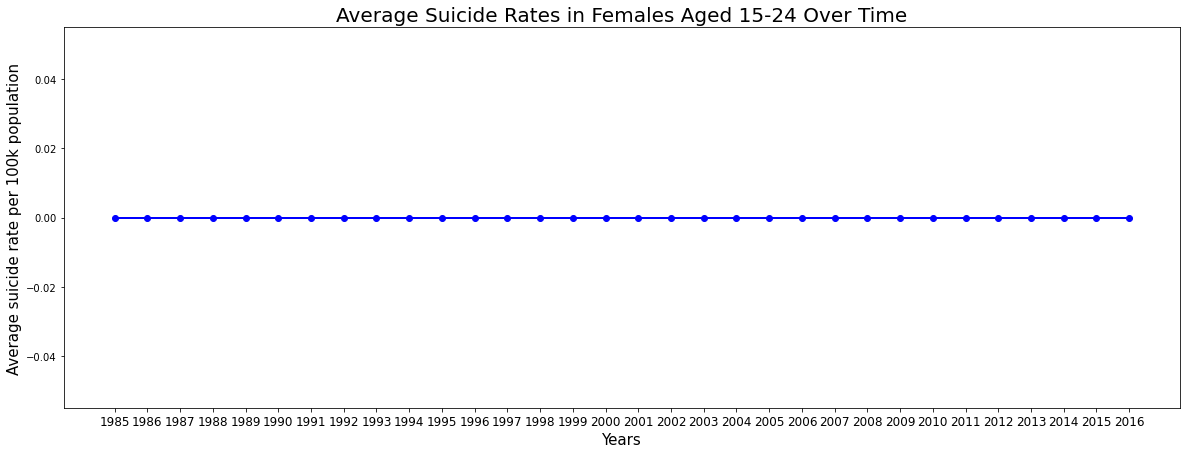

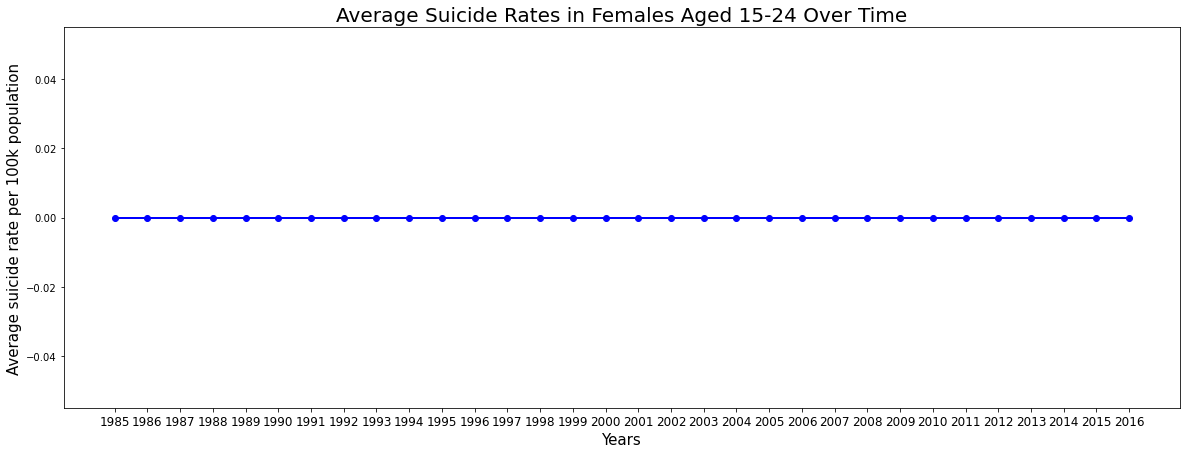

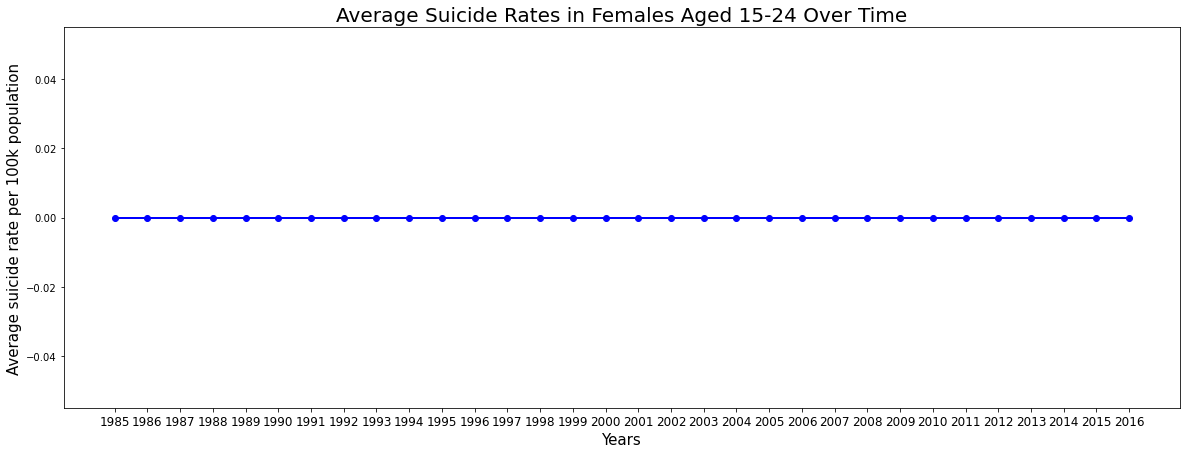

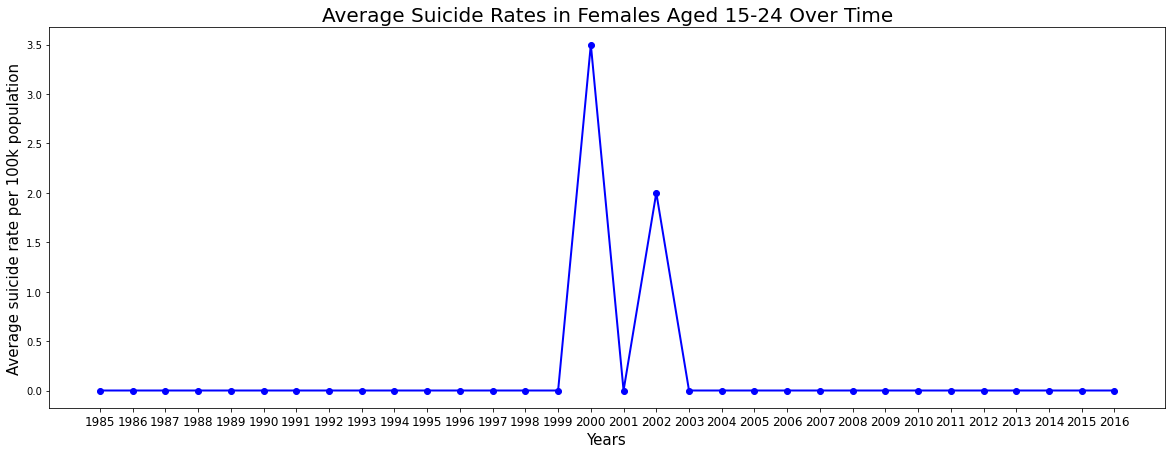

4 of 4 tests passed
11 of 11 tests passed


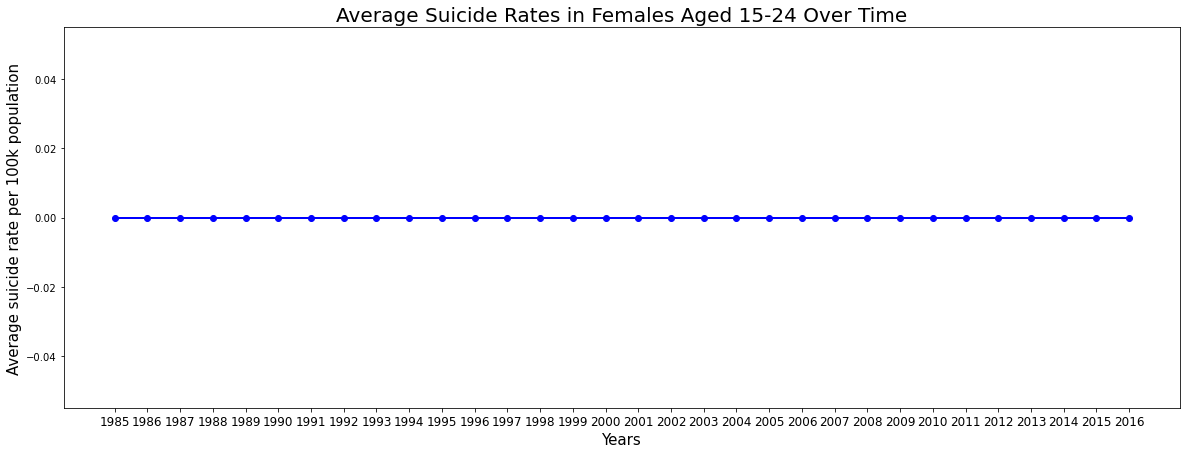

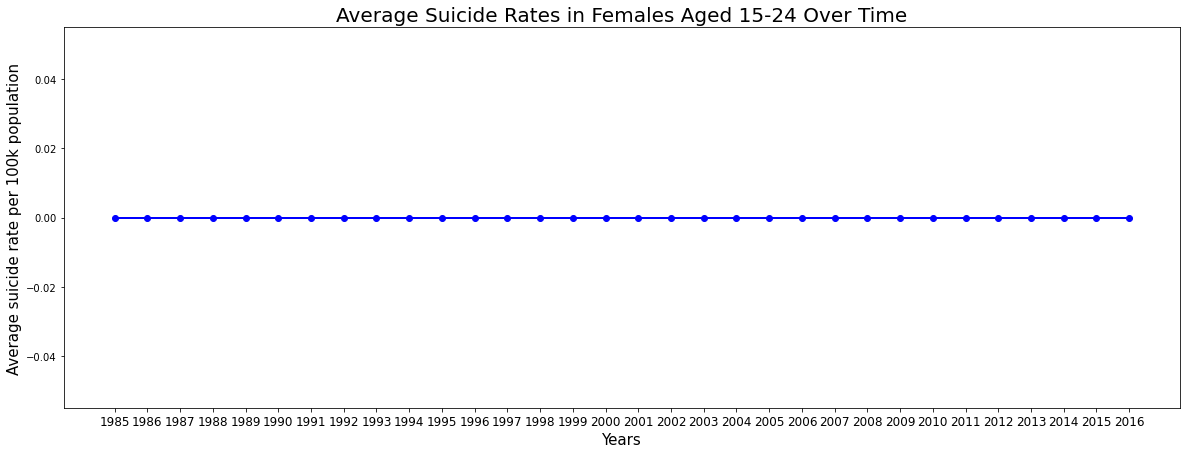

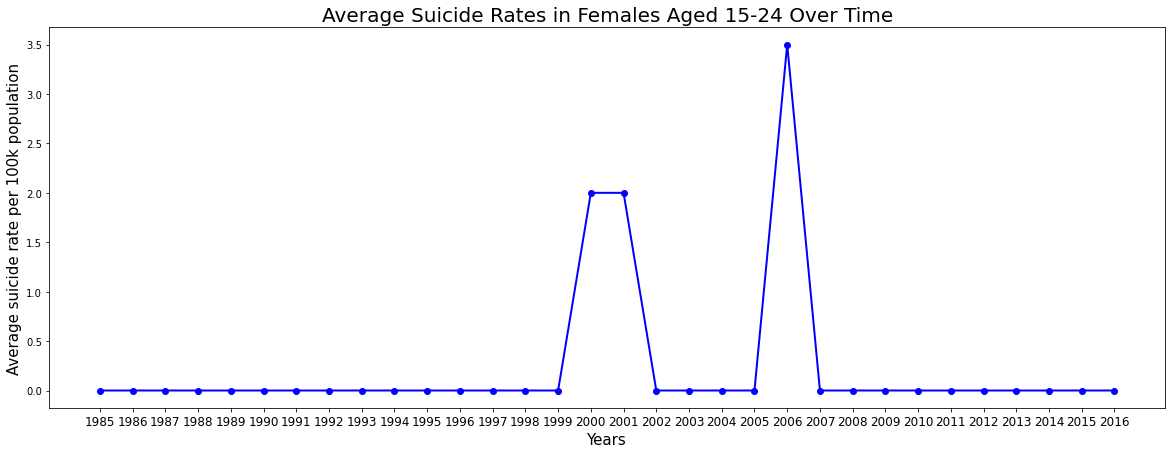

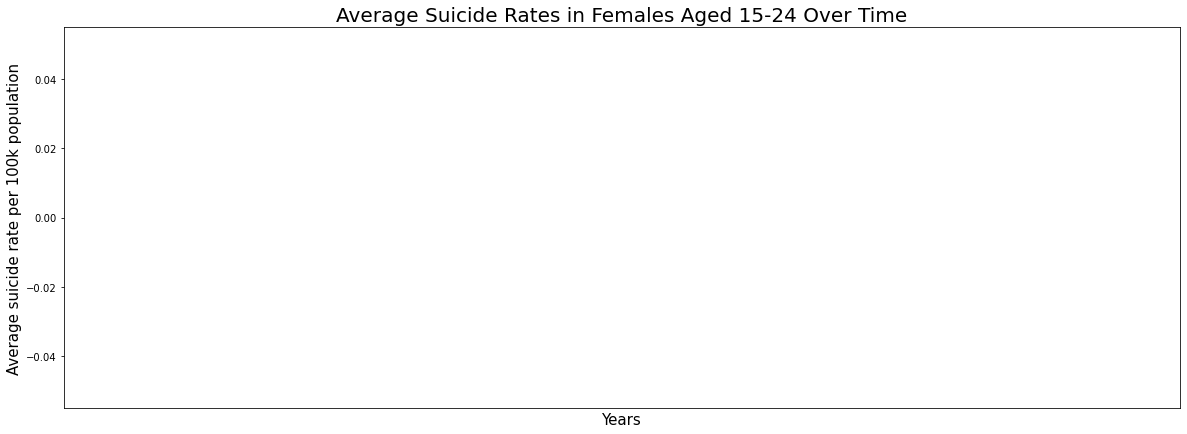

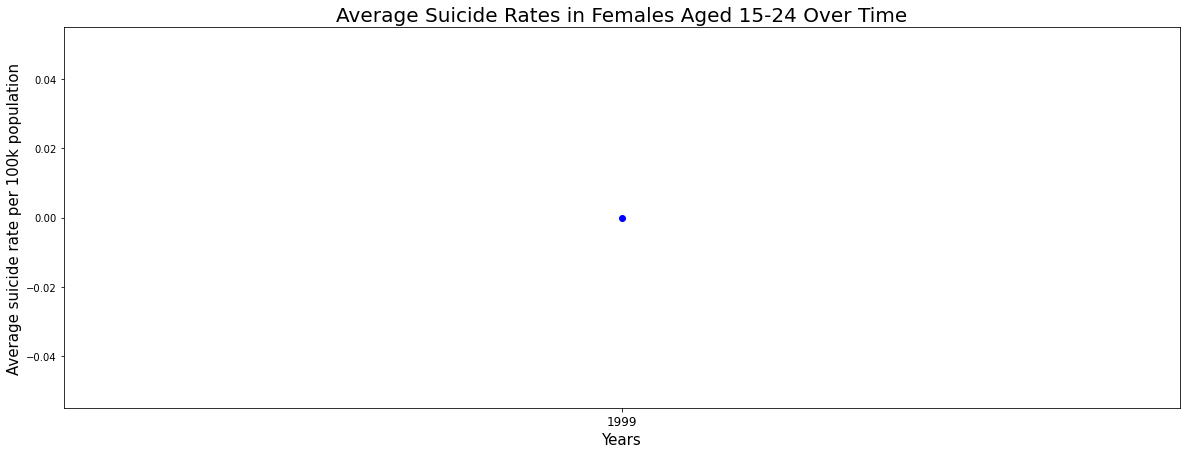

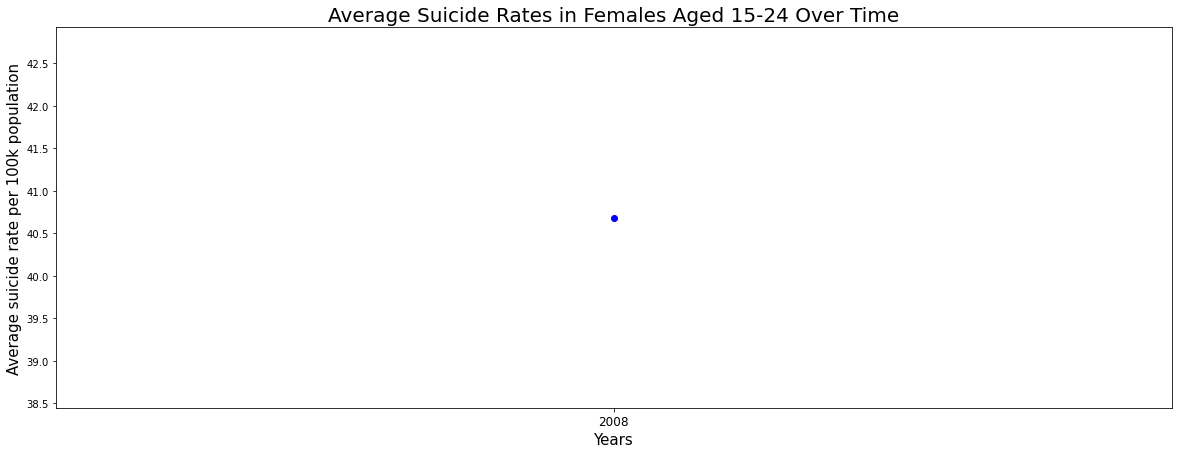

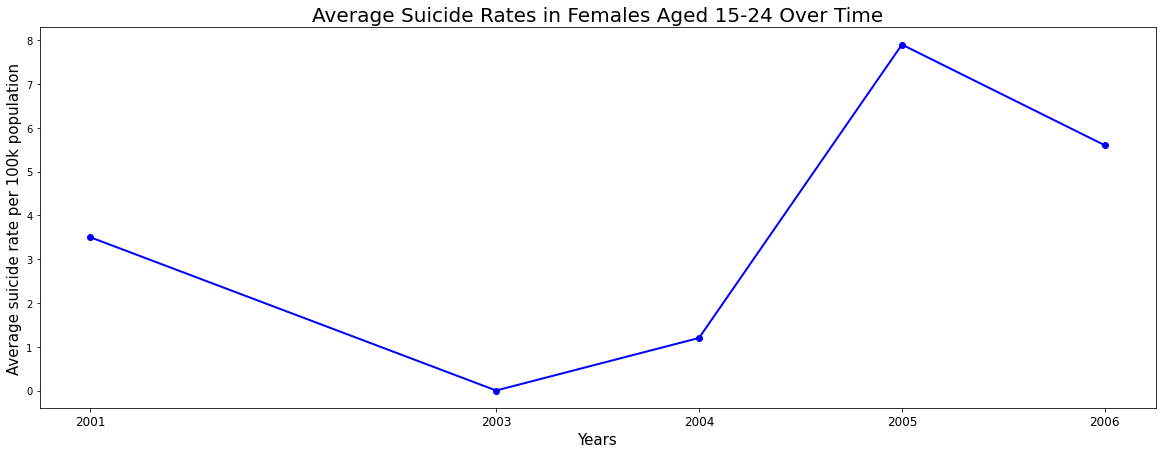

48 of 48 tests passed


In [37]:
### EXAMPLES AND TESTS - separated for clarity

primary = "/Users/alinah/Documents/School/Old/First year Uni/Term 2/Cpsc 103/CSV files/primary_source.csv"
empty = "/Users/alinah/Documents/School/Old/First year Uni/Term 2/Cpsc 103/CSV files/test_file_empty.csv"
small1 = "/Users/alinah/Documents/School/Old/First year Uni/Term 2/Cpsc 103/CSV files/test_file_small1.csv"
small2 = "/Users/alinah/Documents/School/Old/First year Uni/Term 2/Cpsc 103/CSV files/test_file_small2.csv"
small3 = "/Users/alinah/Documents/School/Old/First year Uni/Term 2/Cpsc 103/CSV files/test_file_small3.csv"

start_testing()

# Examples and tests for main
# See markdown cell below for drawings of the main tests
expect(main(empty), None)
expect(main(small1), None)
expect(main(small2), None)
expect(main(small3), None)

summary()

start_testing()

# Examples and tests for read
expect(read(empty), [])
expect(read(small1), [SuicideData(Sex.male, 1987, AgeRange.fifteen_to_twentyfour, 6.71),  
                                      SuicideData(Sex.female, 2000, AgeRange.twentyfive_to_thirtyfour, 2.41)]) 
expect(read(small2), [SuicideData(Sex.male, 1985, AgeRange.fifteen_to_twentyfour, 23.23),
                                     SuicideData(Sex.female, 2014, AgeRange.five_to_fourteen, 0),
                                     SuicideData(Sex.male, 2008, AgeRange.twentyfive_to_thirtyfour, 48.7),
                                     SuicideData(Sex.female, 1997, AgeRange.thirtyfive_to_fiftyfour, 2.38),
                                     SuicideData(Sex.male, 2008, AgeRange.fiftyfive_to_seventyfour, 32.67),
                                     SuicideData(Sex.female, 2000, AgeRange.seventyfive_plus, 23.3)])

expect(parse_sex("male"), Sex.male)
expect(parse_sex("female"), Sex.female)

expect(parse_age_range("5-14 years"), AgeRange.five_to_fourteen)
expect(parse_age_range("15-24 years"), AgeRange.fifteen_to_twentyfour)
expect(parse_age_range("25-34 years"), AgeRange.twentyfive_to_thirtyfour)
expect(parse_age_range("35-54 years"), AgeRange.thirtyfive_to_fiftyfour)
expect(parse_age_range("55-74 years"), AgeRange.fiftyfive_to_seventyfour)
expect(parse_age_range("75+ years"), AgeRange.seventyfive_plus)

summary()

start_testing()

# Examples and tests for analyze (calculate_and_graph_averages)
# See markdown cell below for drawings of the analyze tests
expect(calculate_and_graph_averages([]), None)
expect(calculate_and_graph_averages([SuicideData(Sex.male, 1987, AgeRange.fifteen_to_twentyfour, 6.71),   # right age, wrong sex
                        SuicideData(Sex.female, 2000, AgeRange.twentyfive_to_thirtyfour, 2.41)]), None)  # right sex, wrong age
expect(calculate_and_graph_averages([SuicideData(Sex.male, 1985, AgeRange.fifteen_to_twentyfour, 23.23),
                        SuicideData(Sex.female, 2014, AgeRange.five_to_fourteen, 0),
                        SuicideData(Sex.female, 2006, AgeRange.fifteen_to_twentyfour, 4.0),
                        SuicideData(Sex.female, 2006, AgeRange.fifteen_to_twentyfour, 3.0),
                        SuicideData(Sex.female, 2001, AgeRange.fifteen_to_twentyfour, 2.0),
                        SuicideData(Sex.female, 2000, AgeRange.fifteen_to_twentyfour, 2.0)]), None)


# Examples and tests for steps 1 and 2

# Case 1 filter_for_female_only: empty list
expect(filter_for_female_only([]), [])
# Case 2 filter_for_female_only: no females on list
expect(filter_for_female_only([SuicideData(Sex.male, 1987, AgeRange.fifteen_to_twentyfour, 6.71), 
                              SuicideData(Sex.male, 2008, AgeRange.twentyfive_to_thirtyfour, 48.7)]), [])
# Case 3 filter_for_female_only: some females on list
expect(filter_for_female_only([SuicideData(Sex.male, 1985, AgeRange.fifteen_to_twentyfour, 23.23),
                                SuicideData(Sex.female, 2014, AgeRange.five_to_fourteen, 0),
                                SuicideData(Sex.male, 2008, AgeRange.twentyfive_to_thirtyfour, 48.7),
                                SuicideData(Sex.female, 1997, AgeRange.thirtyfive_to_fiftyfour, 2.38),
                                SuicideData(Sex.male, 2008, AgeRange.fiftyfive_to_seventyfour, 32.67),
                                SuicideData(Sex.female, 2000, AgeRange.seventyfive_plus, 23.3)]), 
                               [SuicideData(Sex.female, 2014, AgeRange.five_to_fourteen, 0),
                                SuicideData(Sex.female, 1997, AgeRange.thirtyfive_to_fiftyfour, 2.38),
                                SuicideData(Sex.female, 2000, AgeRange.seventyfive_plus, 23.3)])
# Case 4 filter_for_female_only: One female on list
expect(filter_for_female_only([SuicideData(Sex.female, 2014, AgeRange.five_to_fourteen, 0)]), 
                               [SuicideData(Sex.female, 2014, AgeRange.five_to_fourteen, 0)])

expect(is_female(Sex.female), True)
expect(is_female(Sex.male), False)

# Case 1 filter_for_fifteen_to_twentyfour_only: empty list
expect(filter_for_fifteen_to_twentyfour_only([]), [])
# Case 2 filter_for_fifteen_to_twentyfour_only: no correct range on list
expect(filter_for_fifteen_to_twentyfour_only([SuicideData(Sex.female, 2014, AgeRange.five_to_fourteen, 0), 
                                             SuicideData(Sex.male, 2008, AgeRange.twentyfive_to_thirtyfour, 48.7)]), [])
# Case 3 filter_for_fifteen_to_twentyfour_only: some correct range on list
expect(filter_for_fifteen_to_twentyfour_only([SuicideData(Sex.male, 1985, AgeRange.fifteen_to_twentyfour, 23.23),
                                              SuicideData(Sex.female, 2014, AgeRange.five_to_fourteen, 0),
                                              SuicideData(Sex.male, 2008, AgeRange.twentyfive_to_thirtyfour, 48.7),
                                              SuicideData(Sex.female, 1997, AgeRange.thirtyfive_to_fiftyfour, 2.38),
                                              SuicideData(Sex.male, 2008, AgeRange.fiftyfive_to_seventyfour, 32.67),
                                              SuicideData(Sex.female, 2000, AgeRange.seventyfive_plus, 23.3),
                                              SuicideData(Sex.female, 1985, AgeRange.fifteen_to_twentyfour, 0)]), 
                                       [SuicideData(Sex.male, 1985, AgeRange.fifteen_to_twentyfour, 23.23),
                                              SuicideData(Sex.female, 1985, AgeRange.fifteen_to_twentyfour, 0)])
# Case 4 filter_for_fifteen_to_twentyfour_only: One correct range on list
expect(filter_for_fifteen_to_twentyfour_only([SuicideData(Sex.female, 1985, AgeRange.fifteen_to_twentyfour, 0)]), 
                                             [SuicideData(Sex.female, 1985, AgeRange.fifteen_to_twentyfour, 0)])


expect(is_fifteen_to_twentyfour(AgeRange.fifteen_to_twentyfour), True)
expect(is_fifteen_to_twentyfour(AgeRange.five_to_fourteen), False)
expect(is_fifteen_to_twentyfour(AgeRange.twentyfive_to_thirtyfour), False)
expect(is_fifteen_to_twentyfour(AgeRange.fiftyfive_to_seventyfour), False)
expect(is_fifteen_to_twentyfour(AgeRange.seventyfive_plus), False)


# Examples and tests for step 3

# Case 1 filter_for_year: empty list
expect(filter_for_year(1989, []), [])
# Case 2 filter_for_year: no data of given year in list
expect(filter_for_year(2001, [SuicideData(Sex.male, 1987, AgeRange.fifteen_to_twentyfour, 6.71), 
                              SuicideData(Sex.male, 2008, AgeRange.twentyfive_to_thirtyfour, 48.7)]), [])
# Case 3 filter_for_year: some data of given year on list
expect(filter_for_year(2008, [SuicideData(Sex.male, 1985, AgeRange.fifteen_to_twentyfour, 23.23),
                                SuicideData(Sex.female, 2014, AgeRange.five_to_fourteen, 0),
                                SuicideData(Sex.male, 2008, AgeRange.twentyfive_to_thirtyfour, 48.7),
                                SuicideData(Sex.female, 1997, AgeRange.thirtyfive_to_fiftyfour, 2.38),
                                SuicideData(Sex.male, 2008, AgeRange.fiftyfive_to_seventyfour, 32.67),
                                SuicideData(Sex.female, 2000, AgeRange.seventyfive_plus, 23.3)]), 
                               [SuicideData(Sex.male, 2008, AgeRange.twentyfive_to_thirtyfour, 48.7),
                                SuicideData(Sex.male, 2008, AgeRange.fiftyfive_to_seventyfour, 32.67)])
# Case 4 filter_for_year: One piece of data of given year
expect(filter_for_year(2014, [SuicideData(Sex.female, 2014, AgeRange.five_to_fourteen, 0)]), 
                               [SuicideData(Sex.female, 2014, AgeRange.five_to_fourteen, 0)])

expect(is_correct_year(2001, 2001), True)
expect(is_correct_year(2001, 2003), False)

expect(add_all_suicide_rates([]), 0.0)
expect(add_all_suicide_rates([SuicideData(Sex.female, 2014, AgeRange.five_to_fourteen, 0)]), 0.0)
expect(add_all_suicide_rates([SuicideData(Sex.male, 2008, AgeRange.fiftyfive_to_seventyfour, 32.67)]), 32.67)
expect(add_all_suicide_rates([SuicideData(Sex.male, 1985, AgeRange.fifteen_to_twentyfour, 23.23),
                                SuicideData(Sex.male, 2008, AgeRange.twentyfive_to_thirtyfour, 48.7),
                                SuicideData(Sex.female, 1997, AgeRange.thirtyfive_to_fiftyfour, 2.38)]), 74.31)

expect(calculate_average(0.0, 1), 0.0)
expect(calculate_average(0.0, 0), 0.0)
expect(calculate_average(74.31, 3), 24.77)

expect(find_num_terms([]), 0)
expect(find_num_terms([SuicideData(Sex.female, 2014, AgeRange.five_to_fourteen, 0)]), 1)
expect(find_num_terms([SuicideData(Sex.male, 1985, AgeRange.fifteen_to_twentyfour, 23.23),
                      SuicideData(Sex.male, 2008, AgeRange.twentyfive_to_thirtyfour, 48.7),
                      SuicideData(Sex.female, 1997, AgeRange.thirtyfive_to_fiftyfour, 2.38)]), 3)

# Case 1 find_yearly_average: empty list
expect(find_yearly_average(2000, []), 0.0)
# Case 2 find_yearly_average: no data of given year in list
expect(find_yearly_average(2001, [SuicideData(Sex.male, 1985, AgeRange.fifteen_to_twentyfour, 23.23)]), 0.0)
# Case 3 some data of given year in list
expect(find_yearly_average(2008,[SuicideData(Sex.male, 1985, AgeRange.fifteen_to_twentyfour, 23.23),
                                SuicideData(Sex.male, 2008, AgeRange.twentyfive_to_thirtyfour, 48.7),
                                SuicideData(Sex.female, 1997, AgeRange.thirtyfive_to_fiftyfour, 2.38),
                                SuicideData(Sex.male, 2008, AgeRange.fiftyfive_to_seventyfour, 32.67)]), 40.685)
# Case 4 one piece of data of given year 
expect(find_yearly_average(1985, [SuicideData(Sex.male, 1985, AgeRange.fifteen_to_twentyfour, 23.23)]), 23.23)

# Case 1 collect_averages : empty list
expect(collect_averages([], []), [])
expect(collect_averages([2001, 2002], []), [0.0, 0.0])
# Case 2: find_yearly_average: no data of given year in list
expect(collect_averages([1989], [SuicideData(Sex.male, 1985, AgeRange.fifteen_to_twentyfour, 23.23),
                                SuicideData(Sex.male, 2008, AgeRange.twentyfive_to_thirtyfour, 48.7)]), [0.0])
# Case 3: some data of given year in list
expect(collect_averages([1985, 2008], [SuicideData(Sex.male, 1985, AgeRange.fifteen_to_twentyfour, 23.23),
                                    SuicideData(Sex.male, 2008, AgeRange.twentyfive_to_thirtyfour, 48.7),
                                    SuicideData(Sex.female, 1997, AgeRange.thirtyfive_to_fiftyfour, 2.38),
                                    SuicideData(Sex.male, 2008, AgeRange.fiftyfive_to_seventyfour, 32.67)]), 
                                    [23.23, 40.685])
# Case 4: one piece of data of given year 
expect(collect_averages([1987], [SuicideData(Sex.male, 1987, AgeRange.fifteen_to_twentyfour, 6.71)]), [6.71])
expect(collect_averages([2001, 2003], [SuicideData(Sex.male, 2001, AgeRange.fifteen_to_twentyfour, 4.0),
                                       SuicideData(Sex.male, 2001, AgeRange.fifteen_to_twentyfour, 3.0)]), [3.5, 0.0])

# Examples and tests for step 4
# See markdown cell below for drawings of the plot_average_by_years tests
expect(plot_averages_by_years([], []), None)
expect(plot_averages_by_years([1999], [0.0]), None)
expect(plot_averages_by_years([2008], [40.685]), None)
expect(plot_averages_by_years([2001, 2003, 2004, 2005, 2006], [3.5, 0.0, 1.2, 7.9, 5.6]), None)

summary()

graph tests:
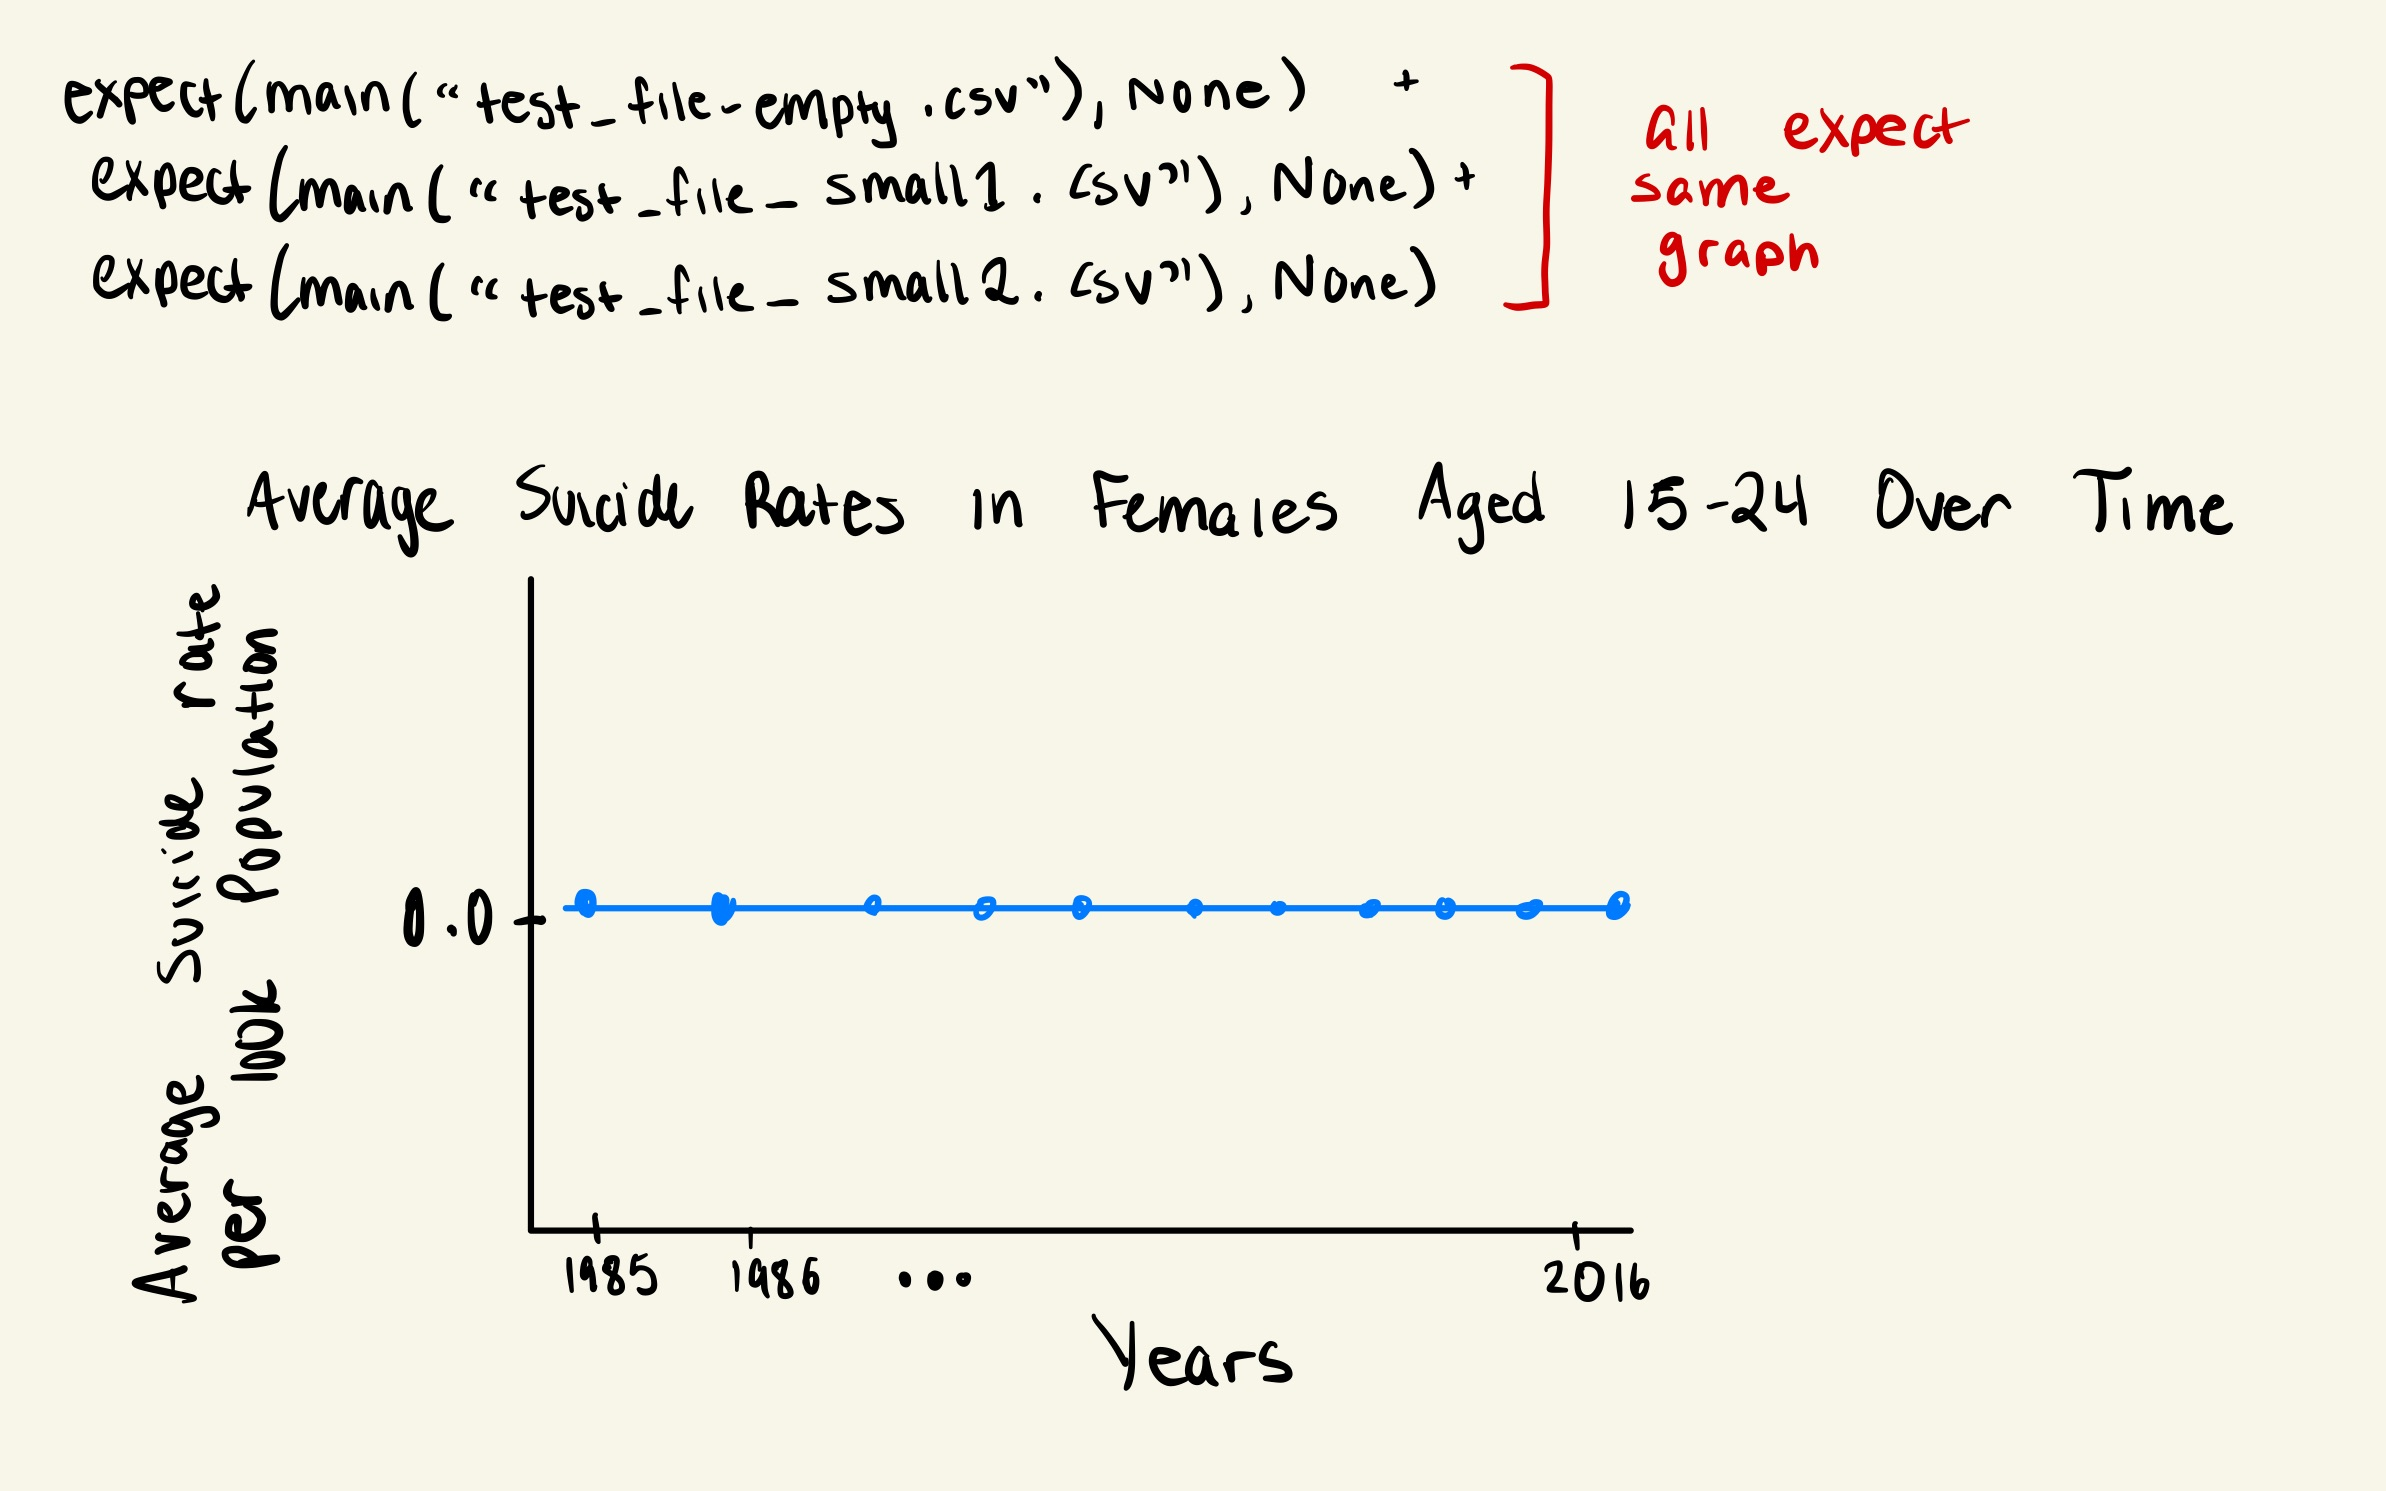
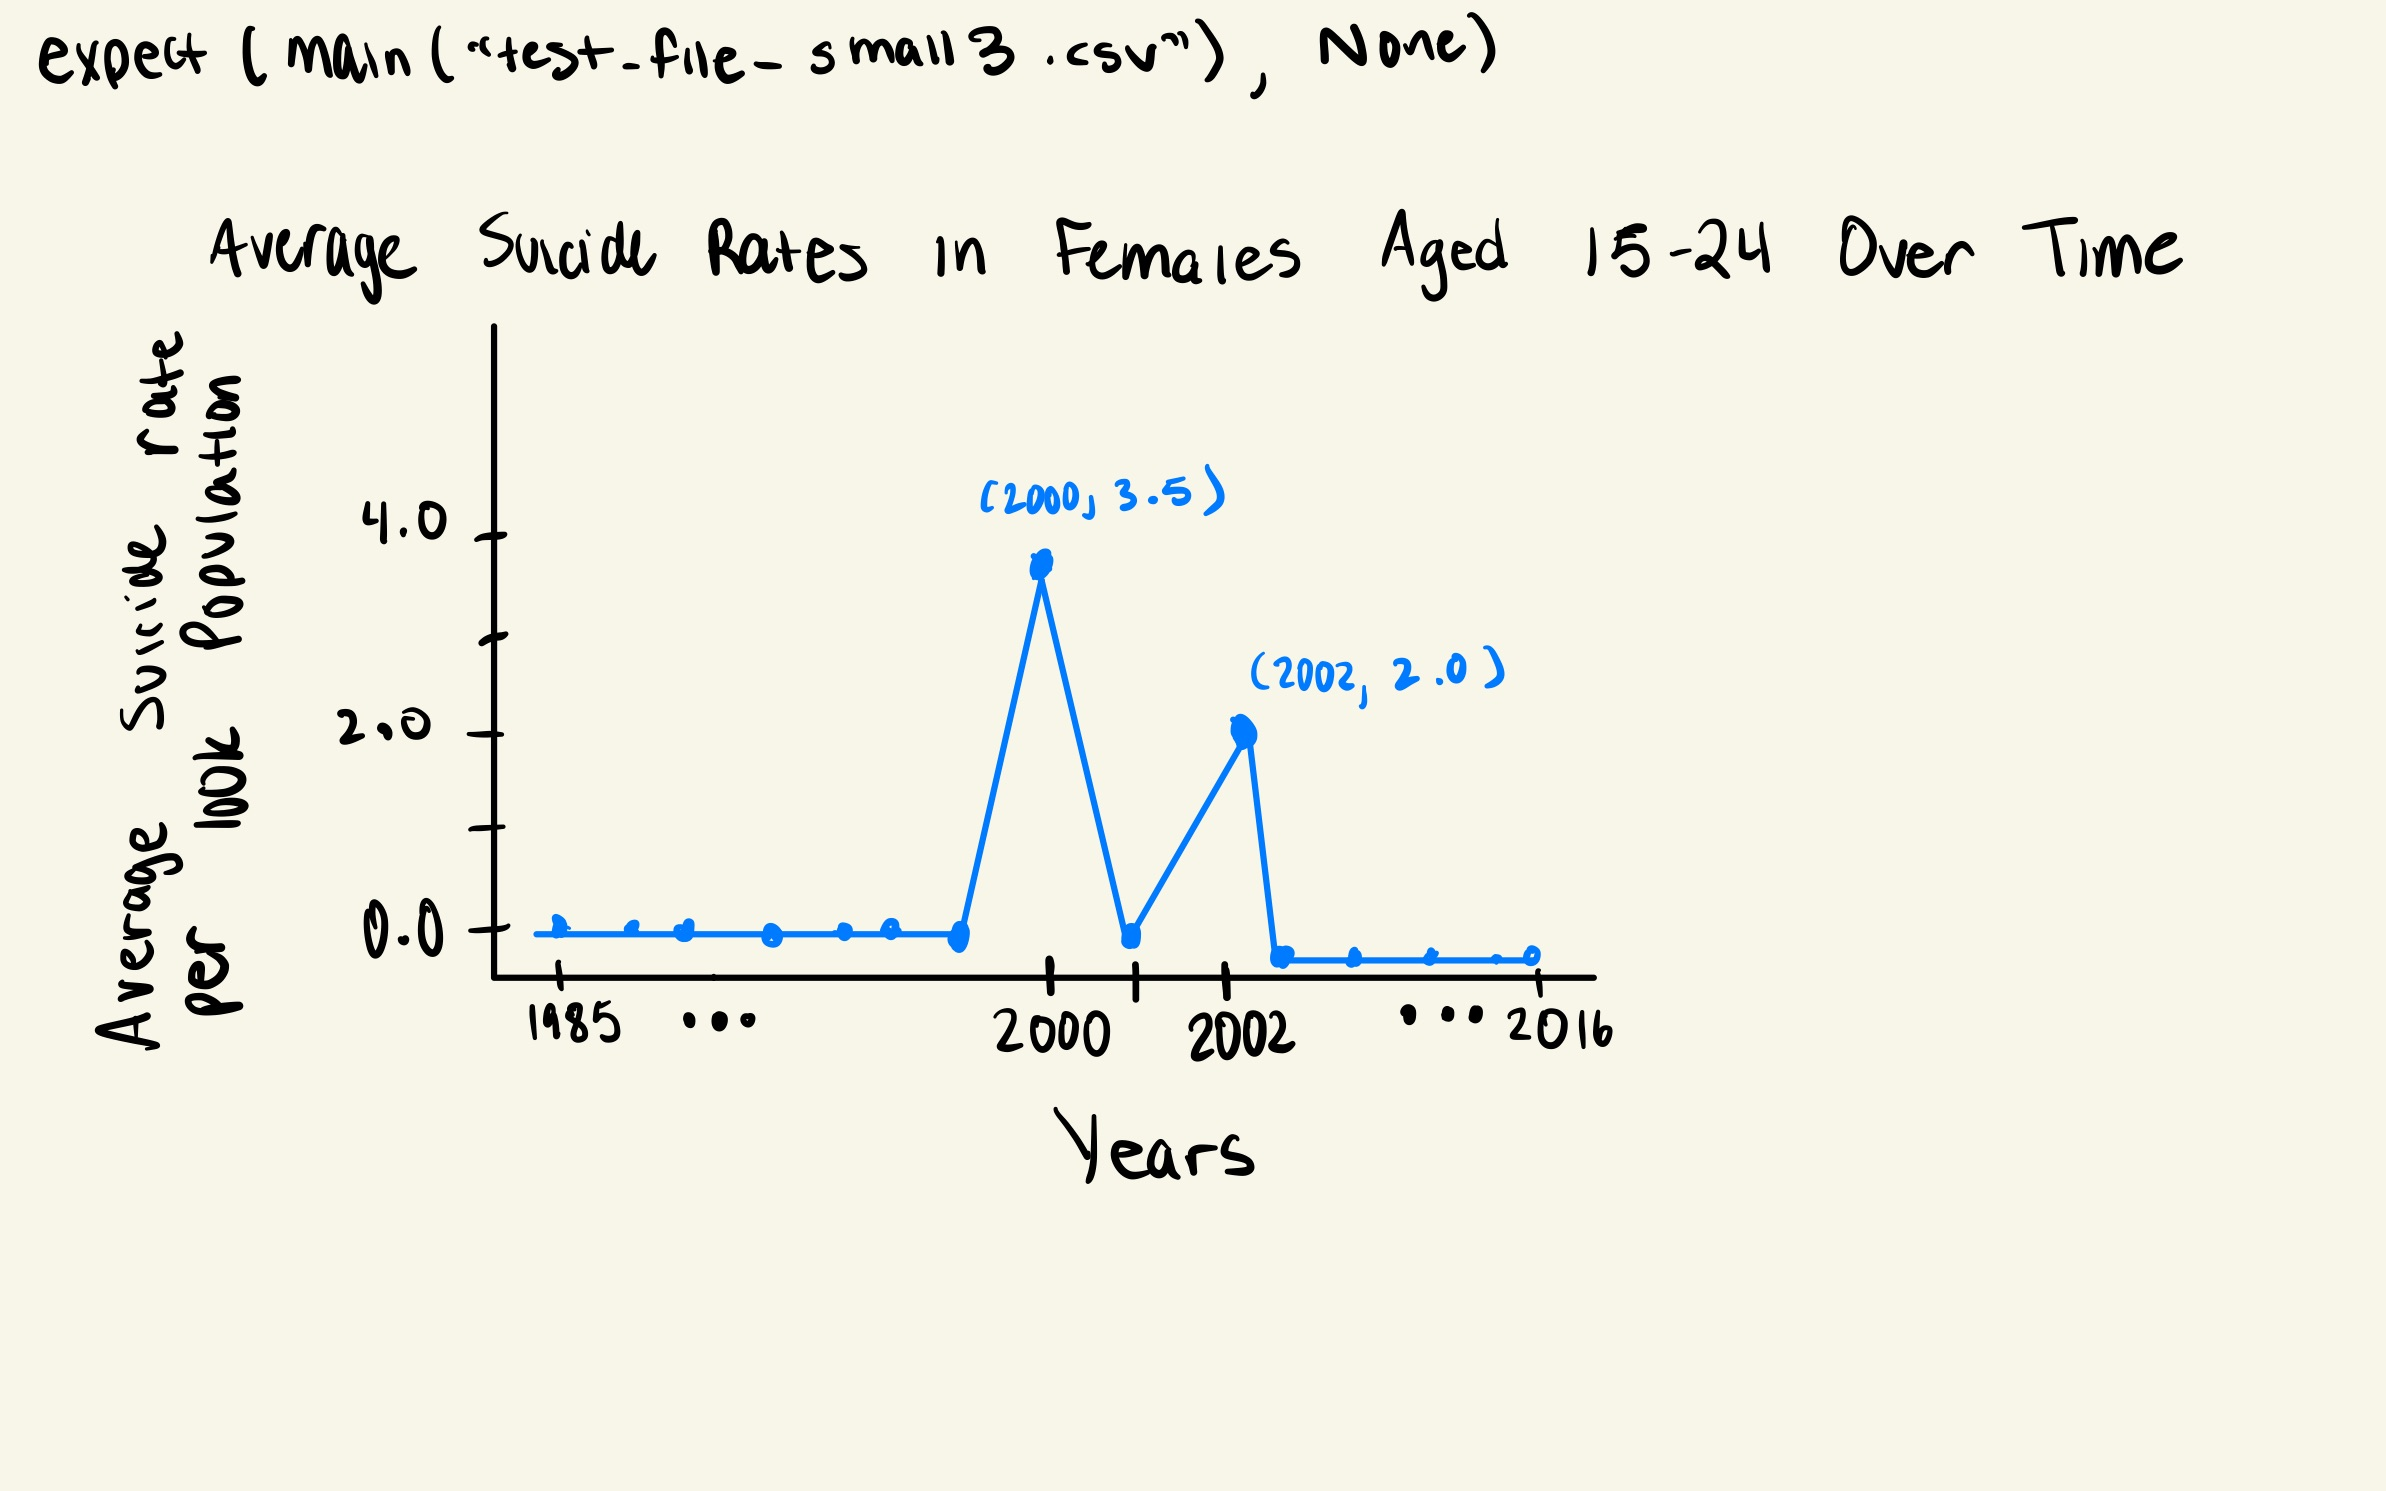
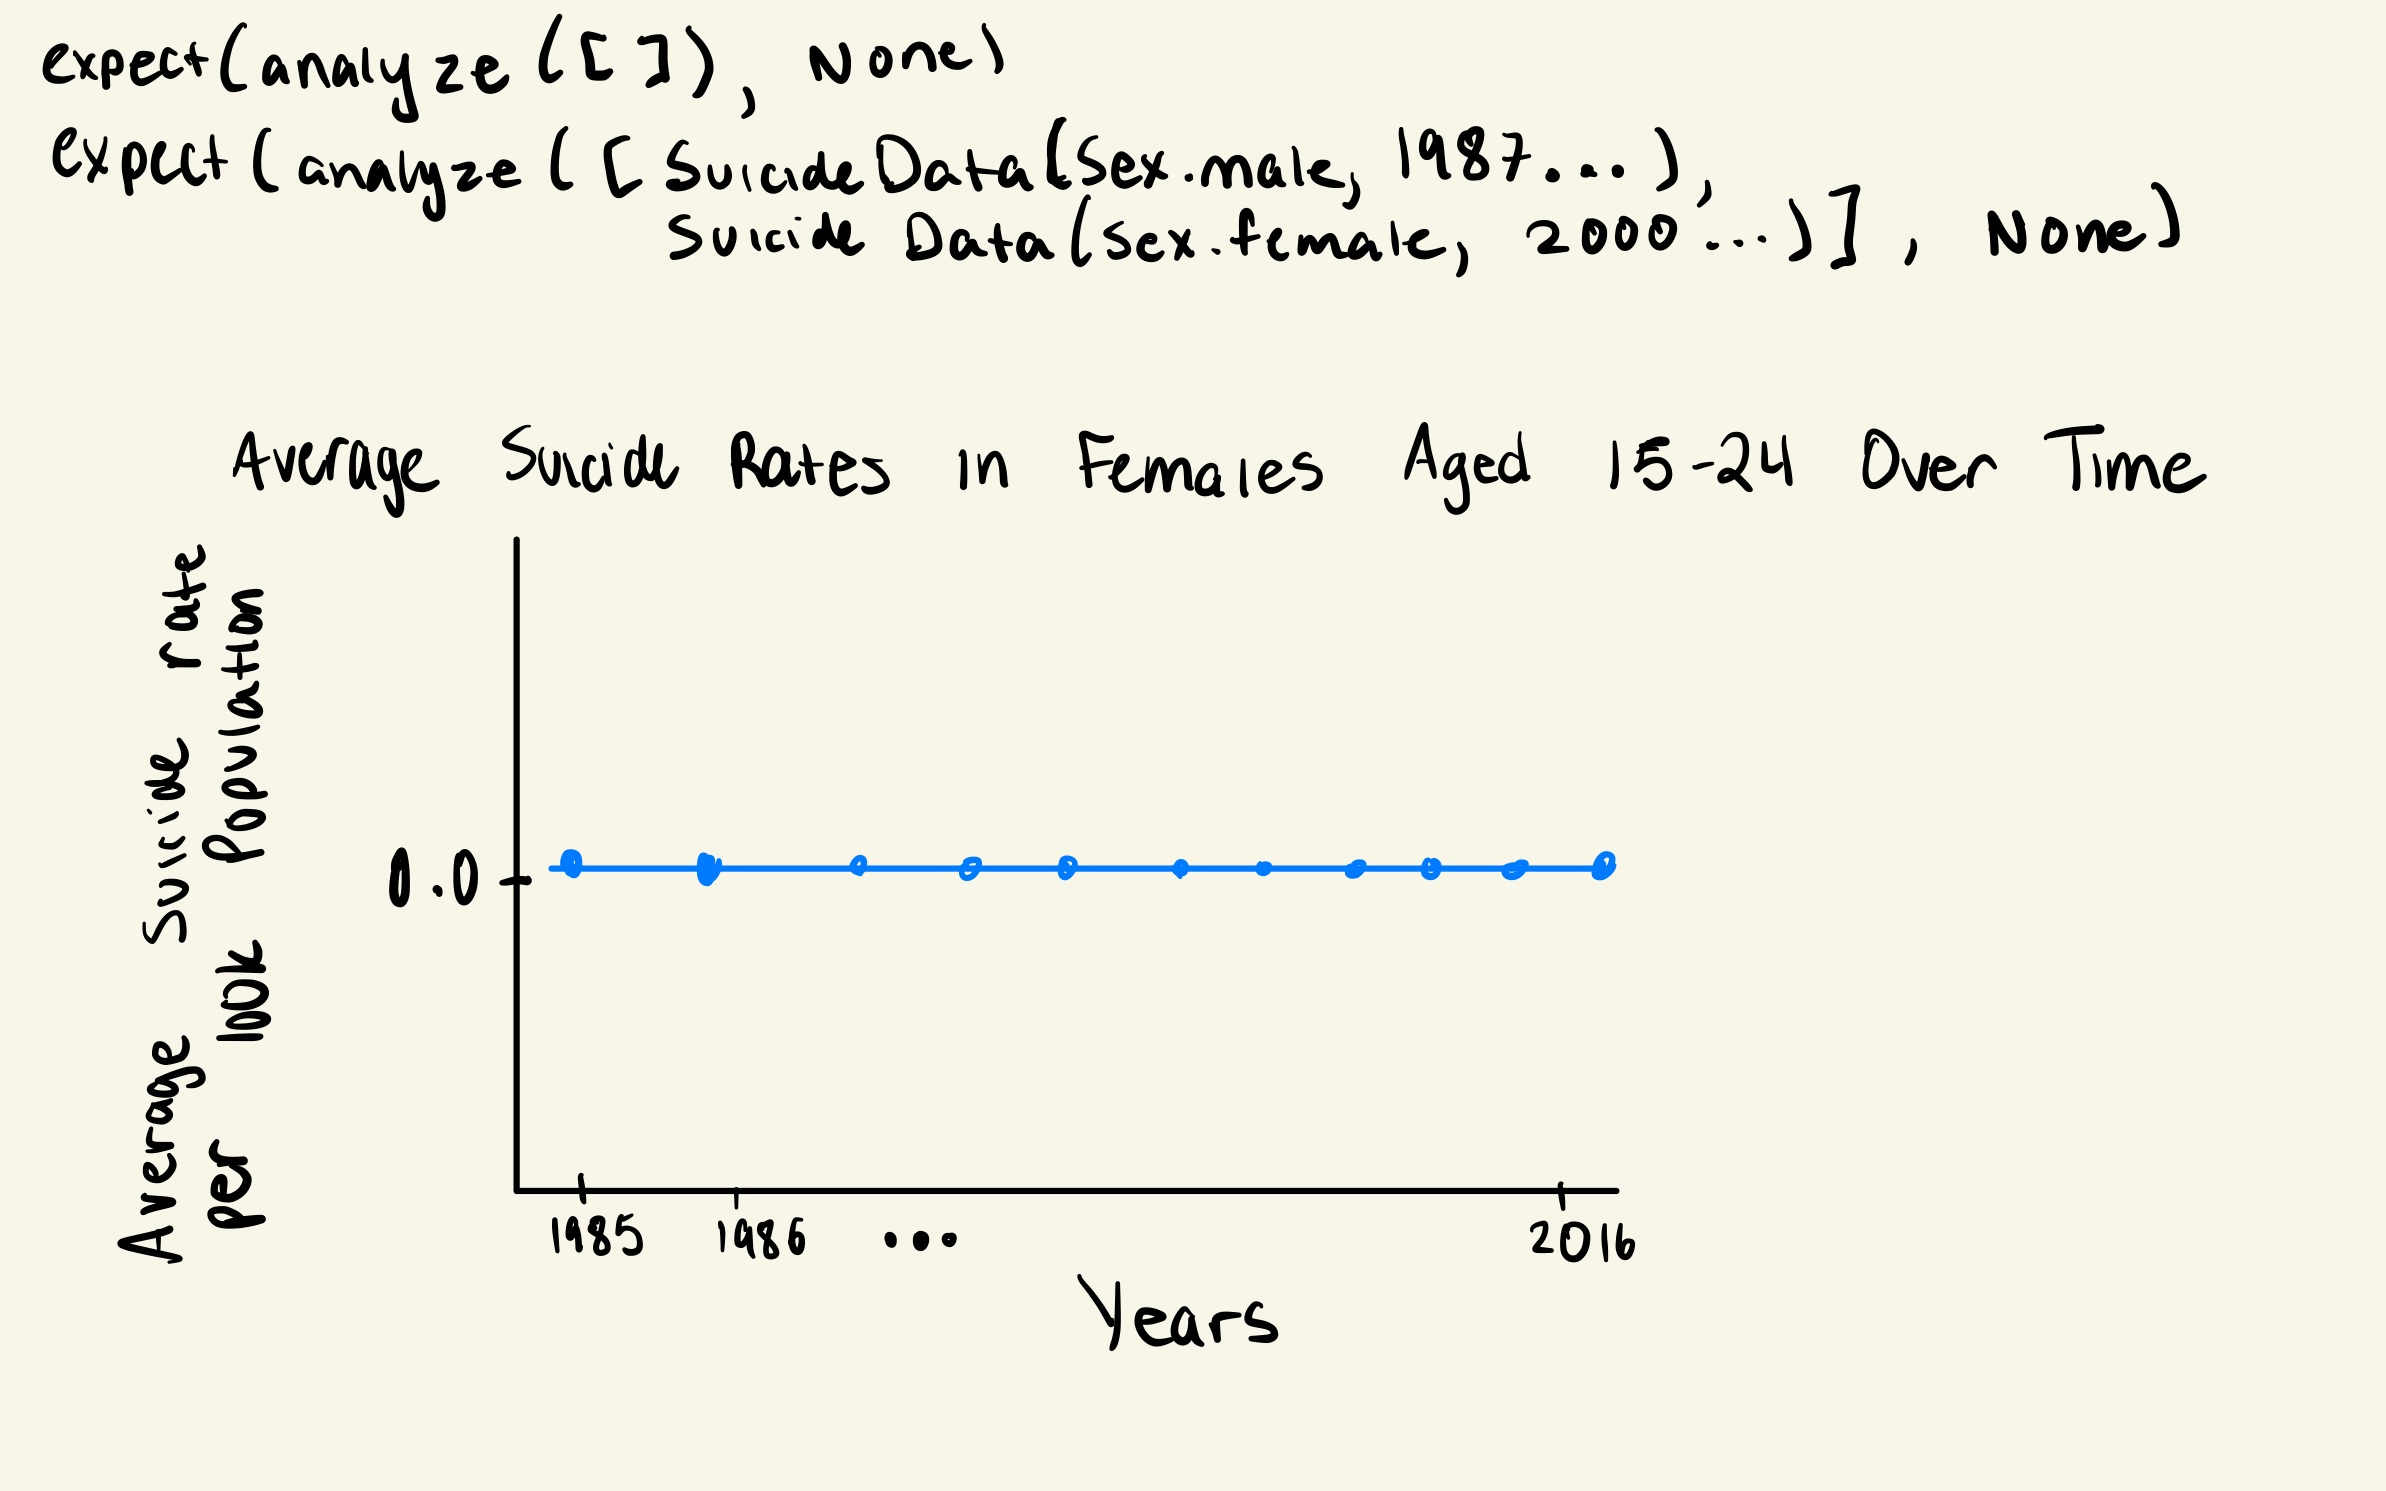
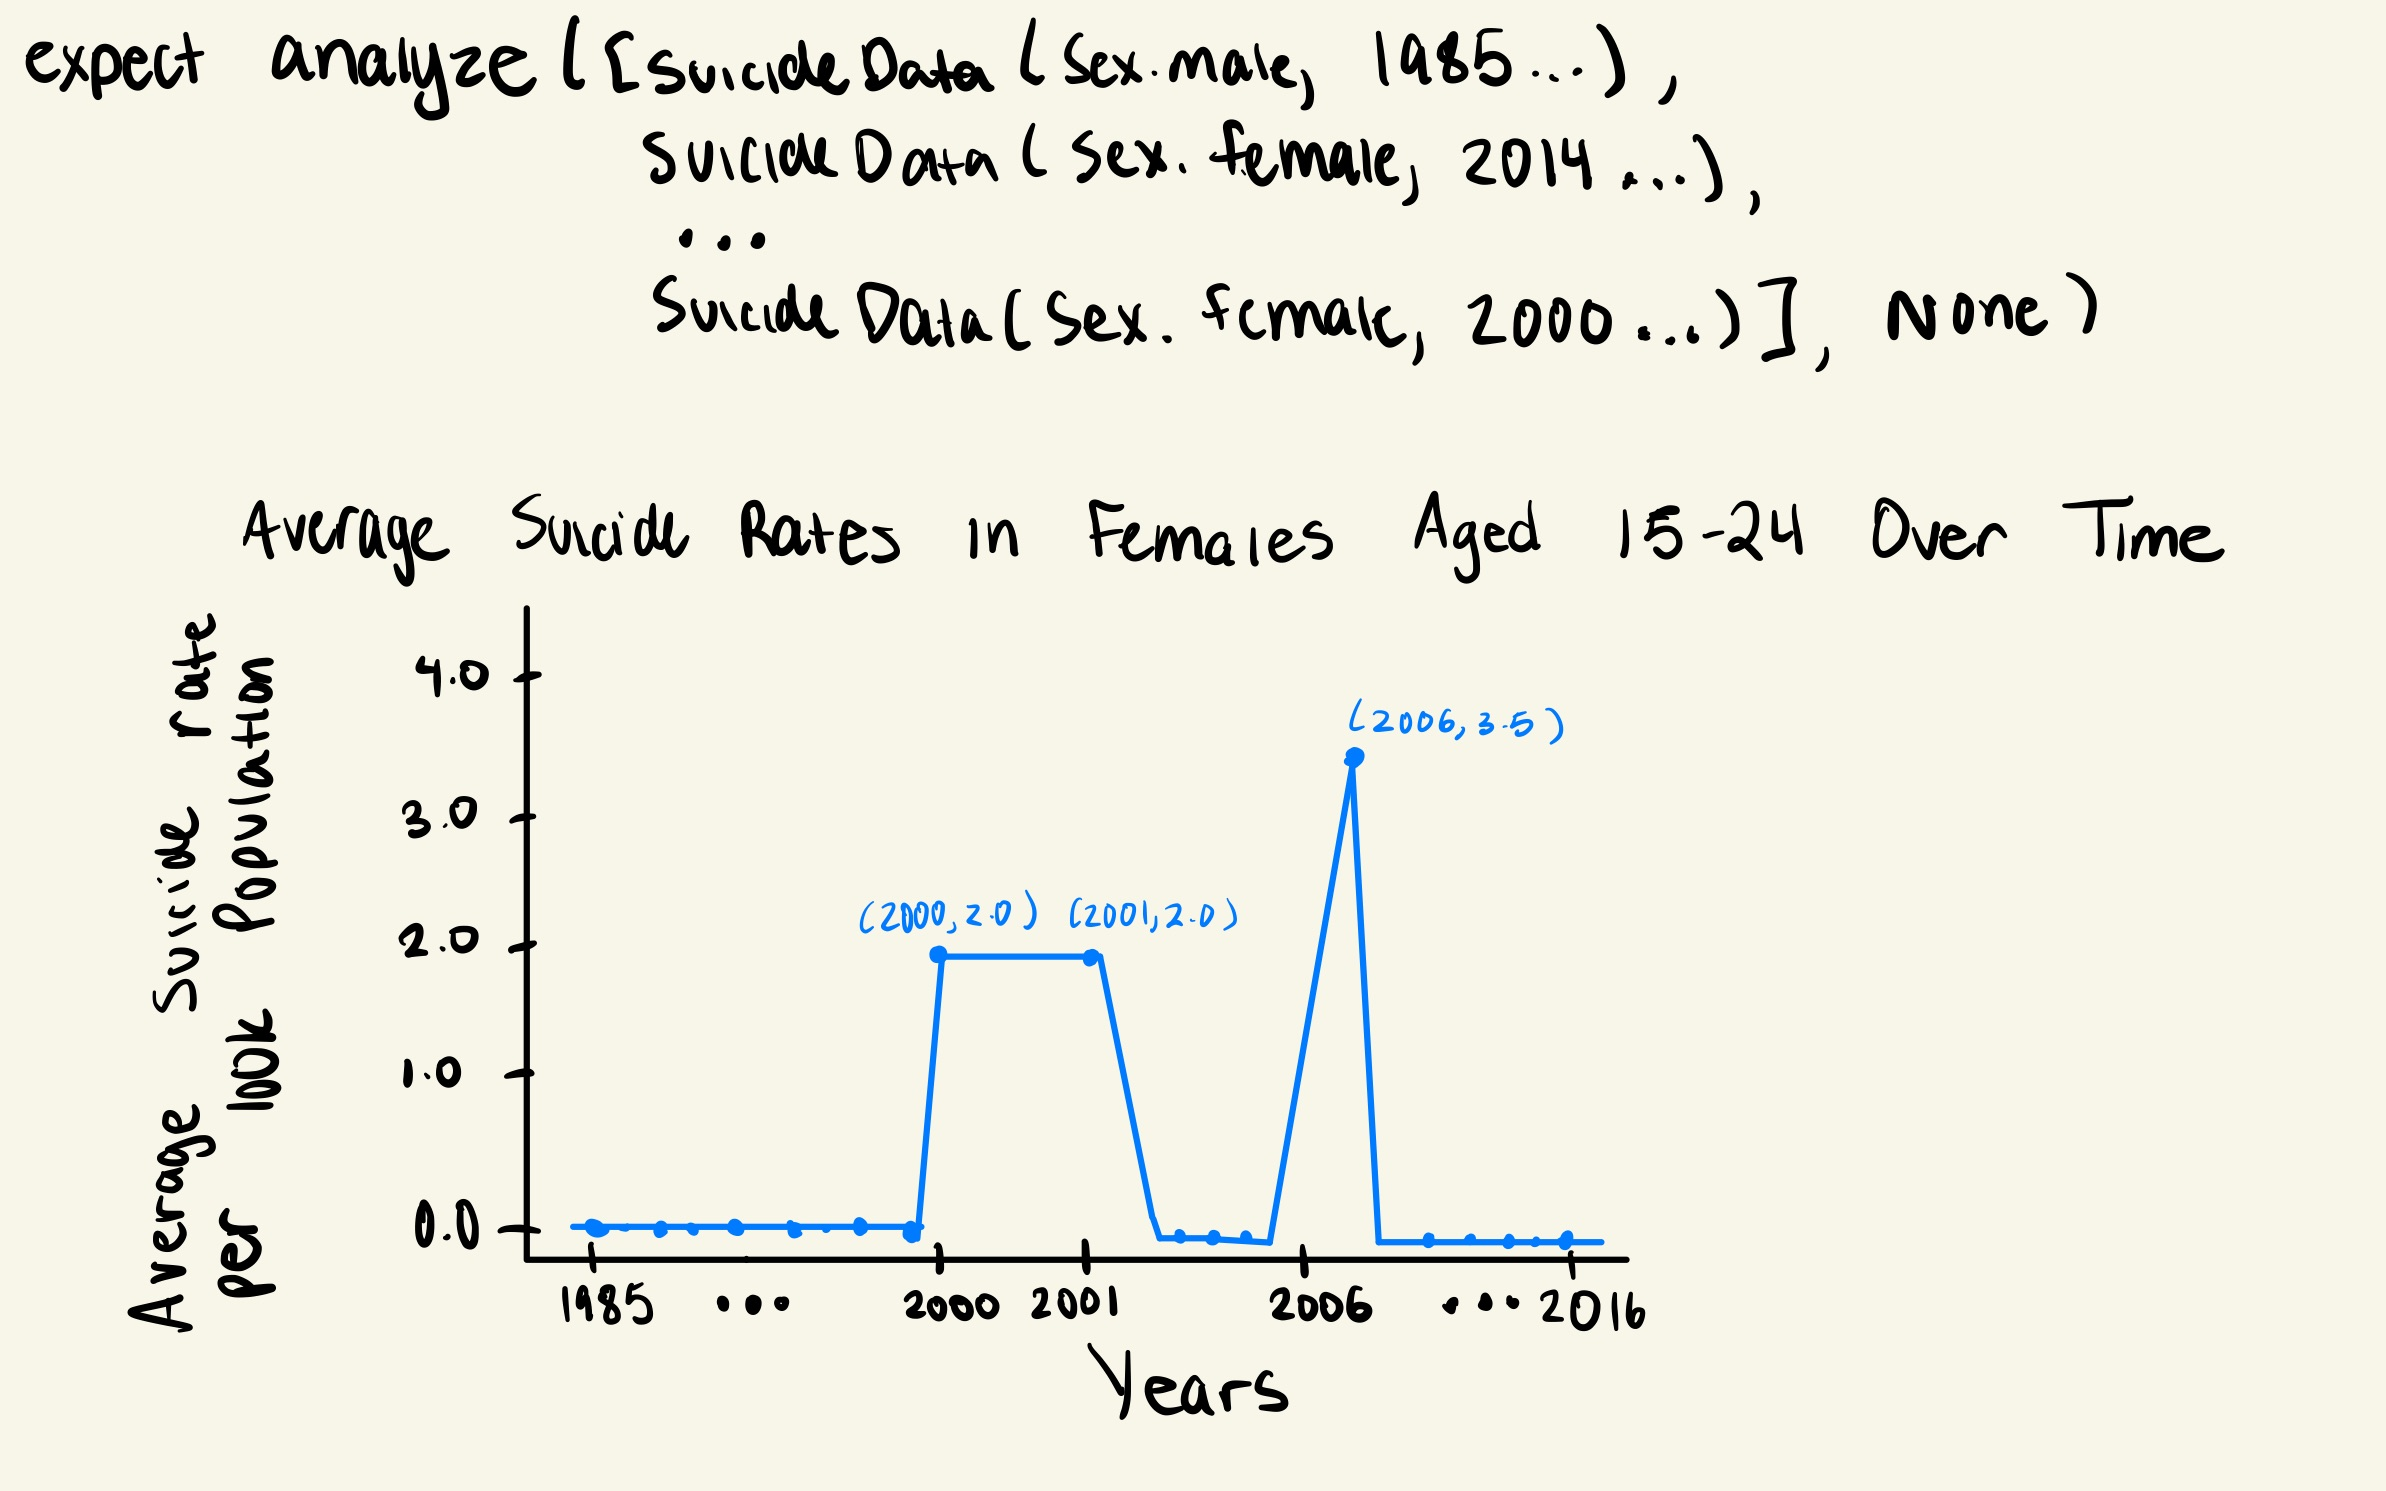
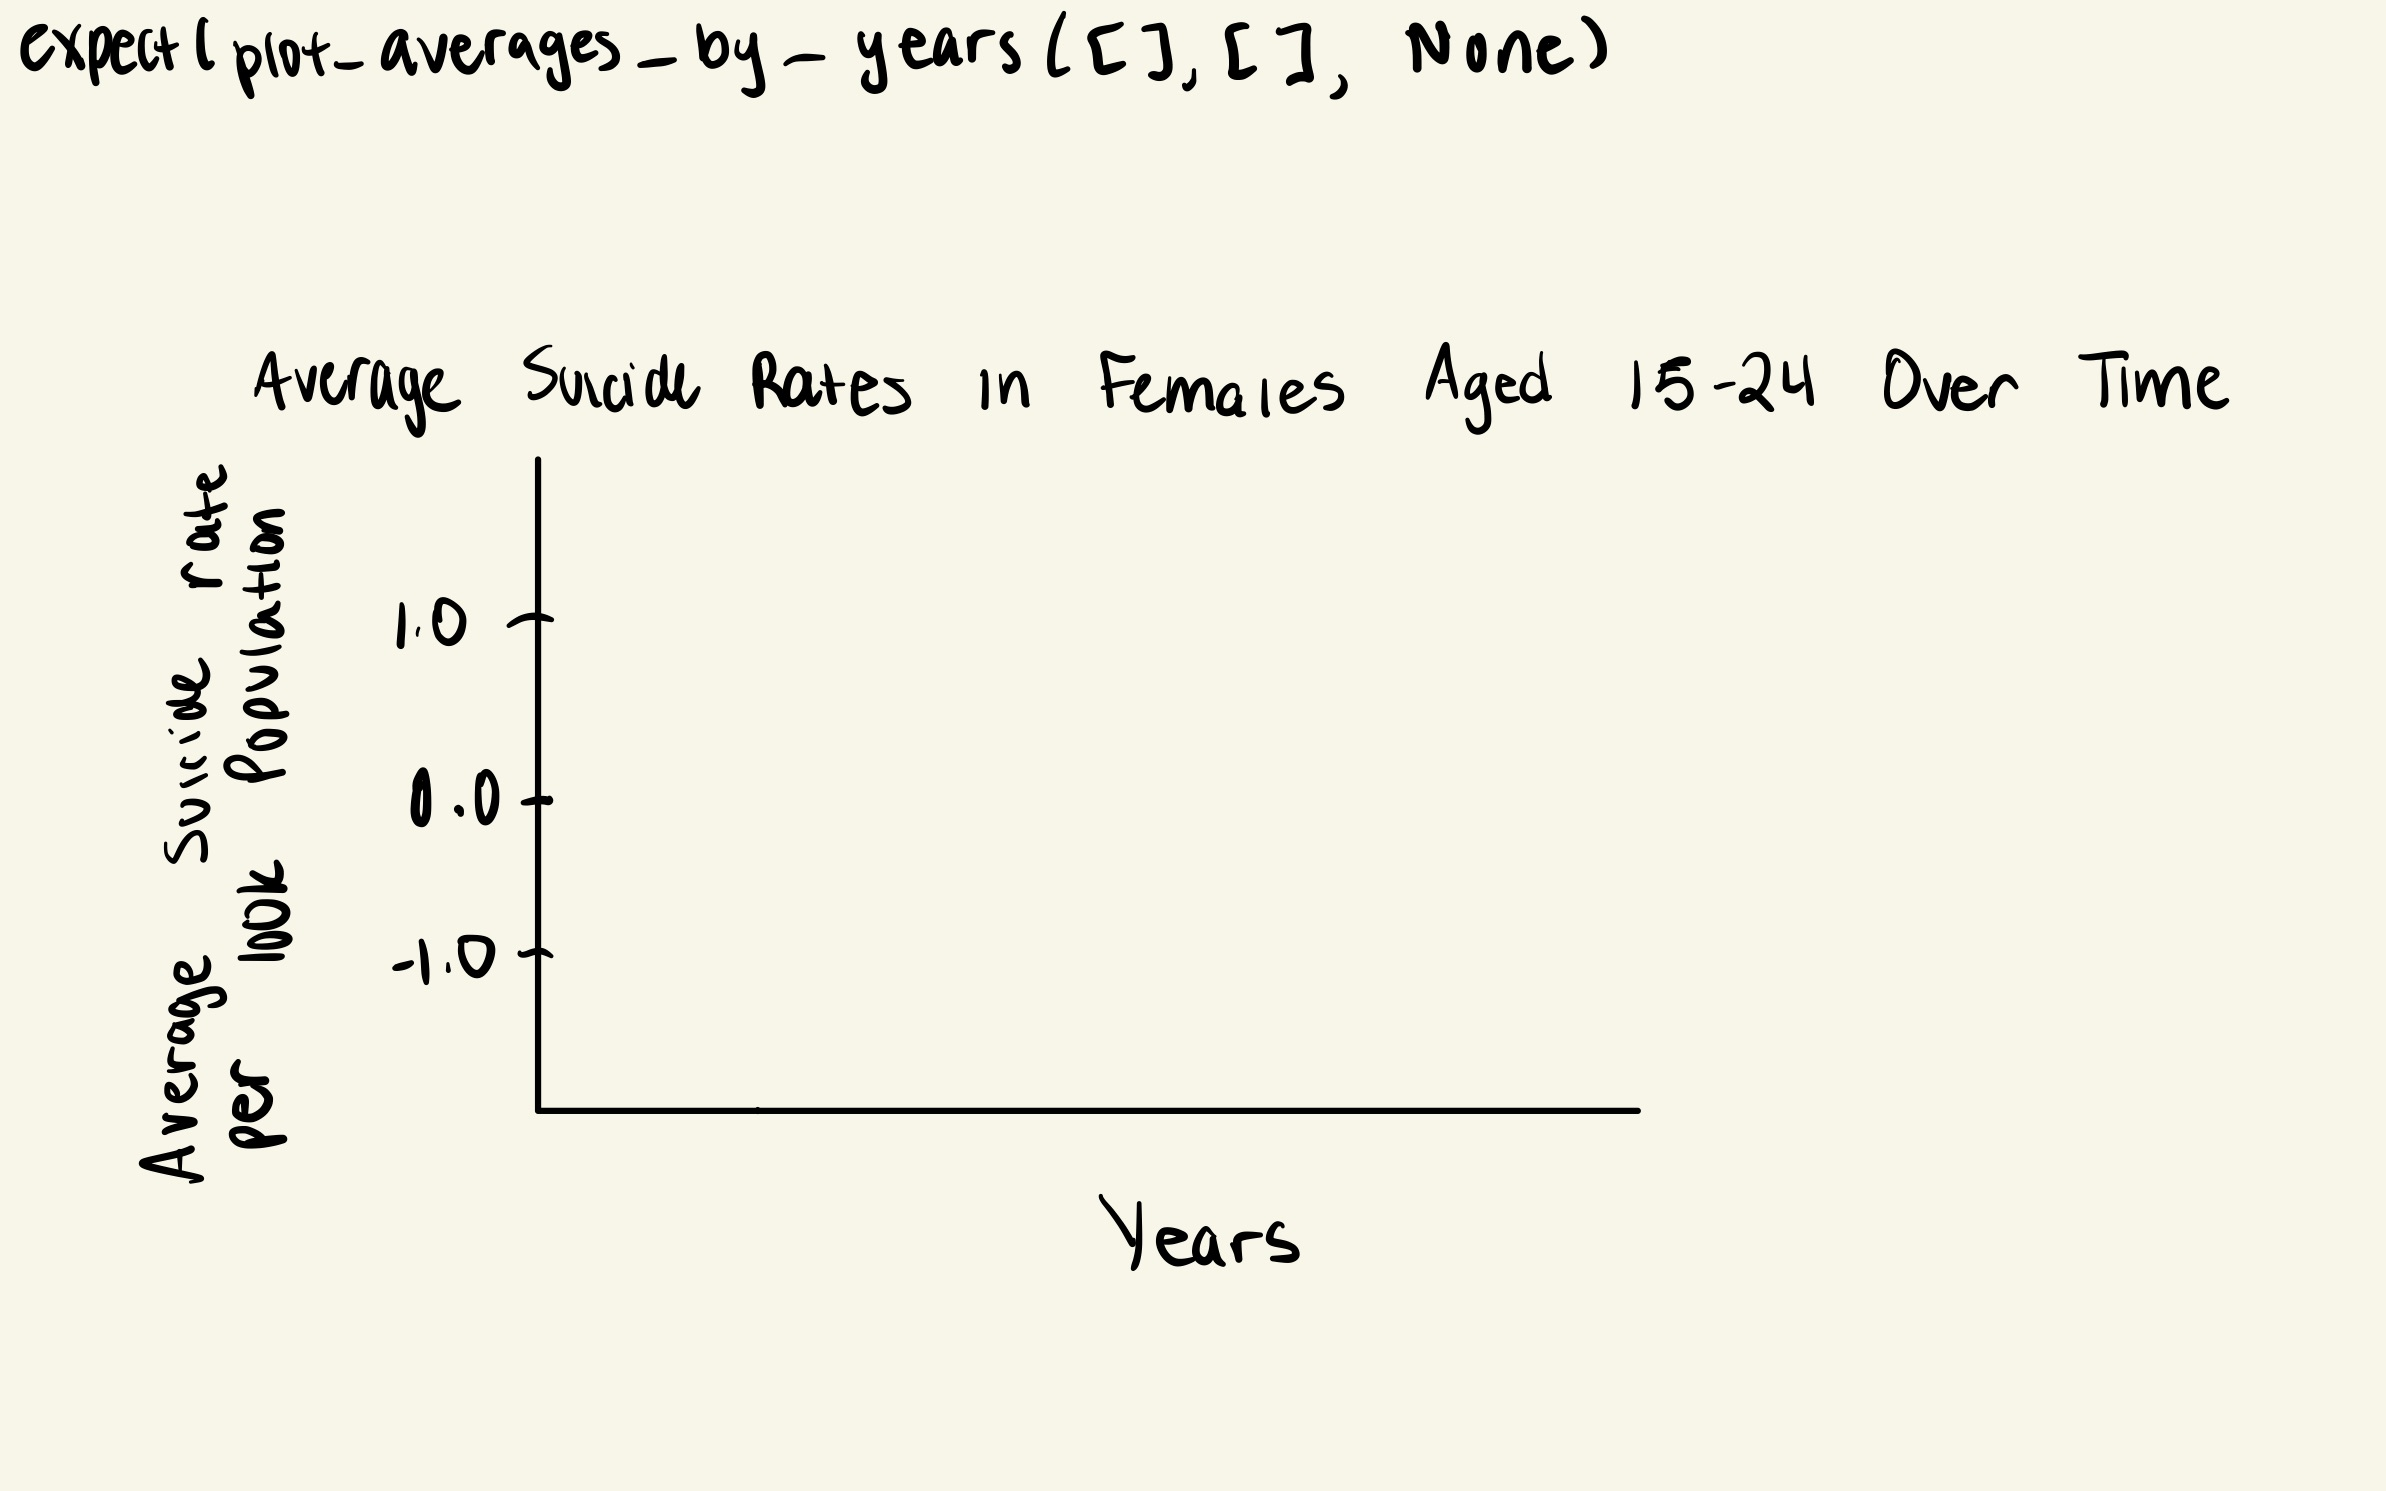
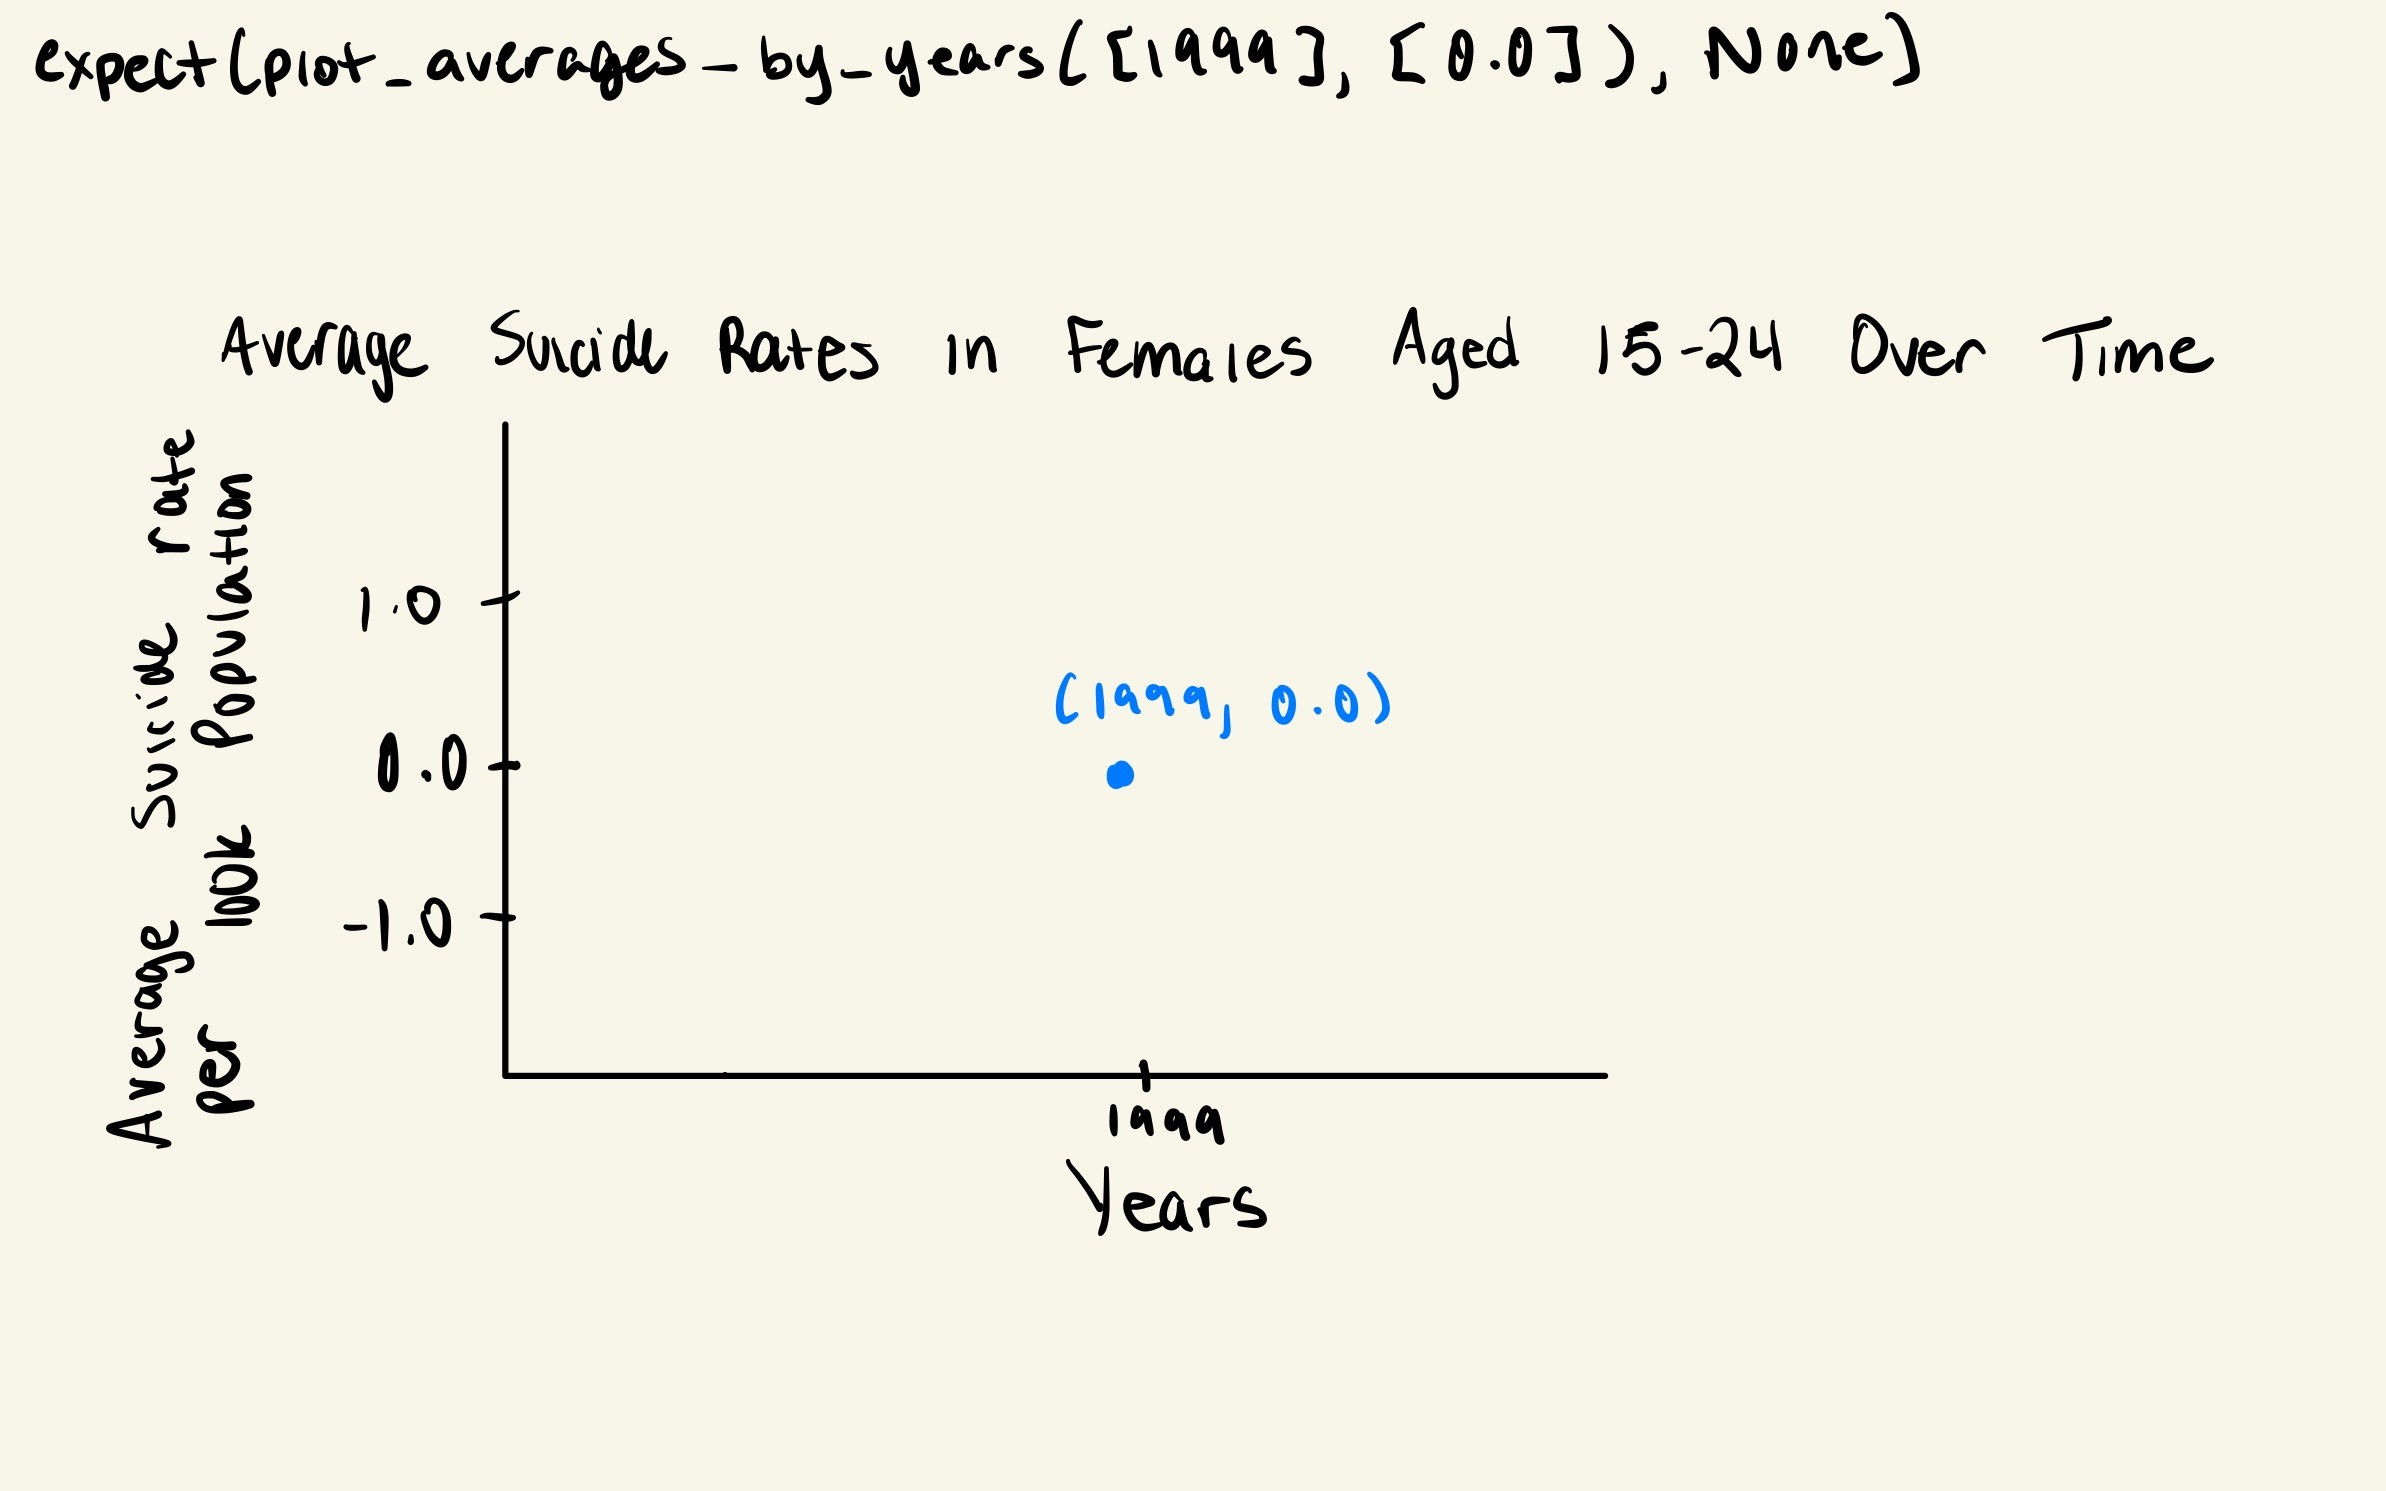
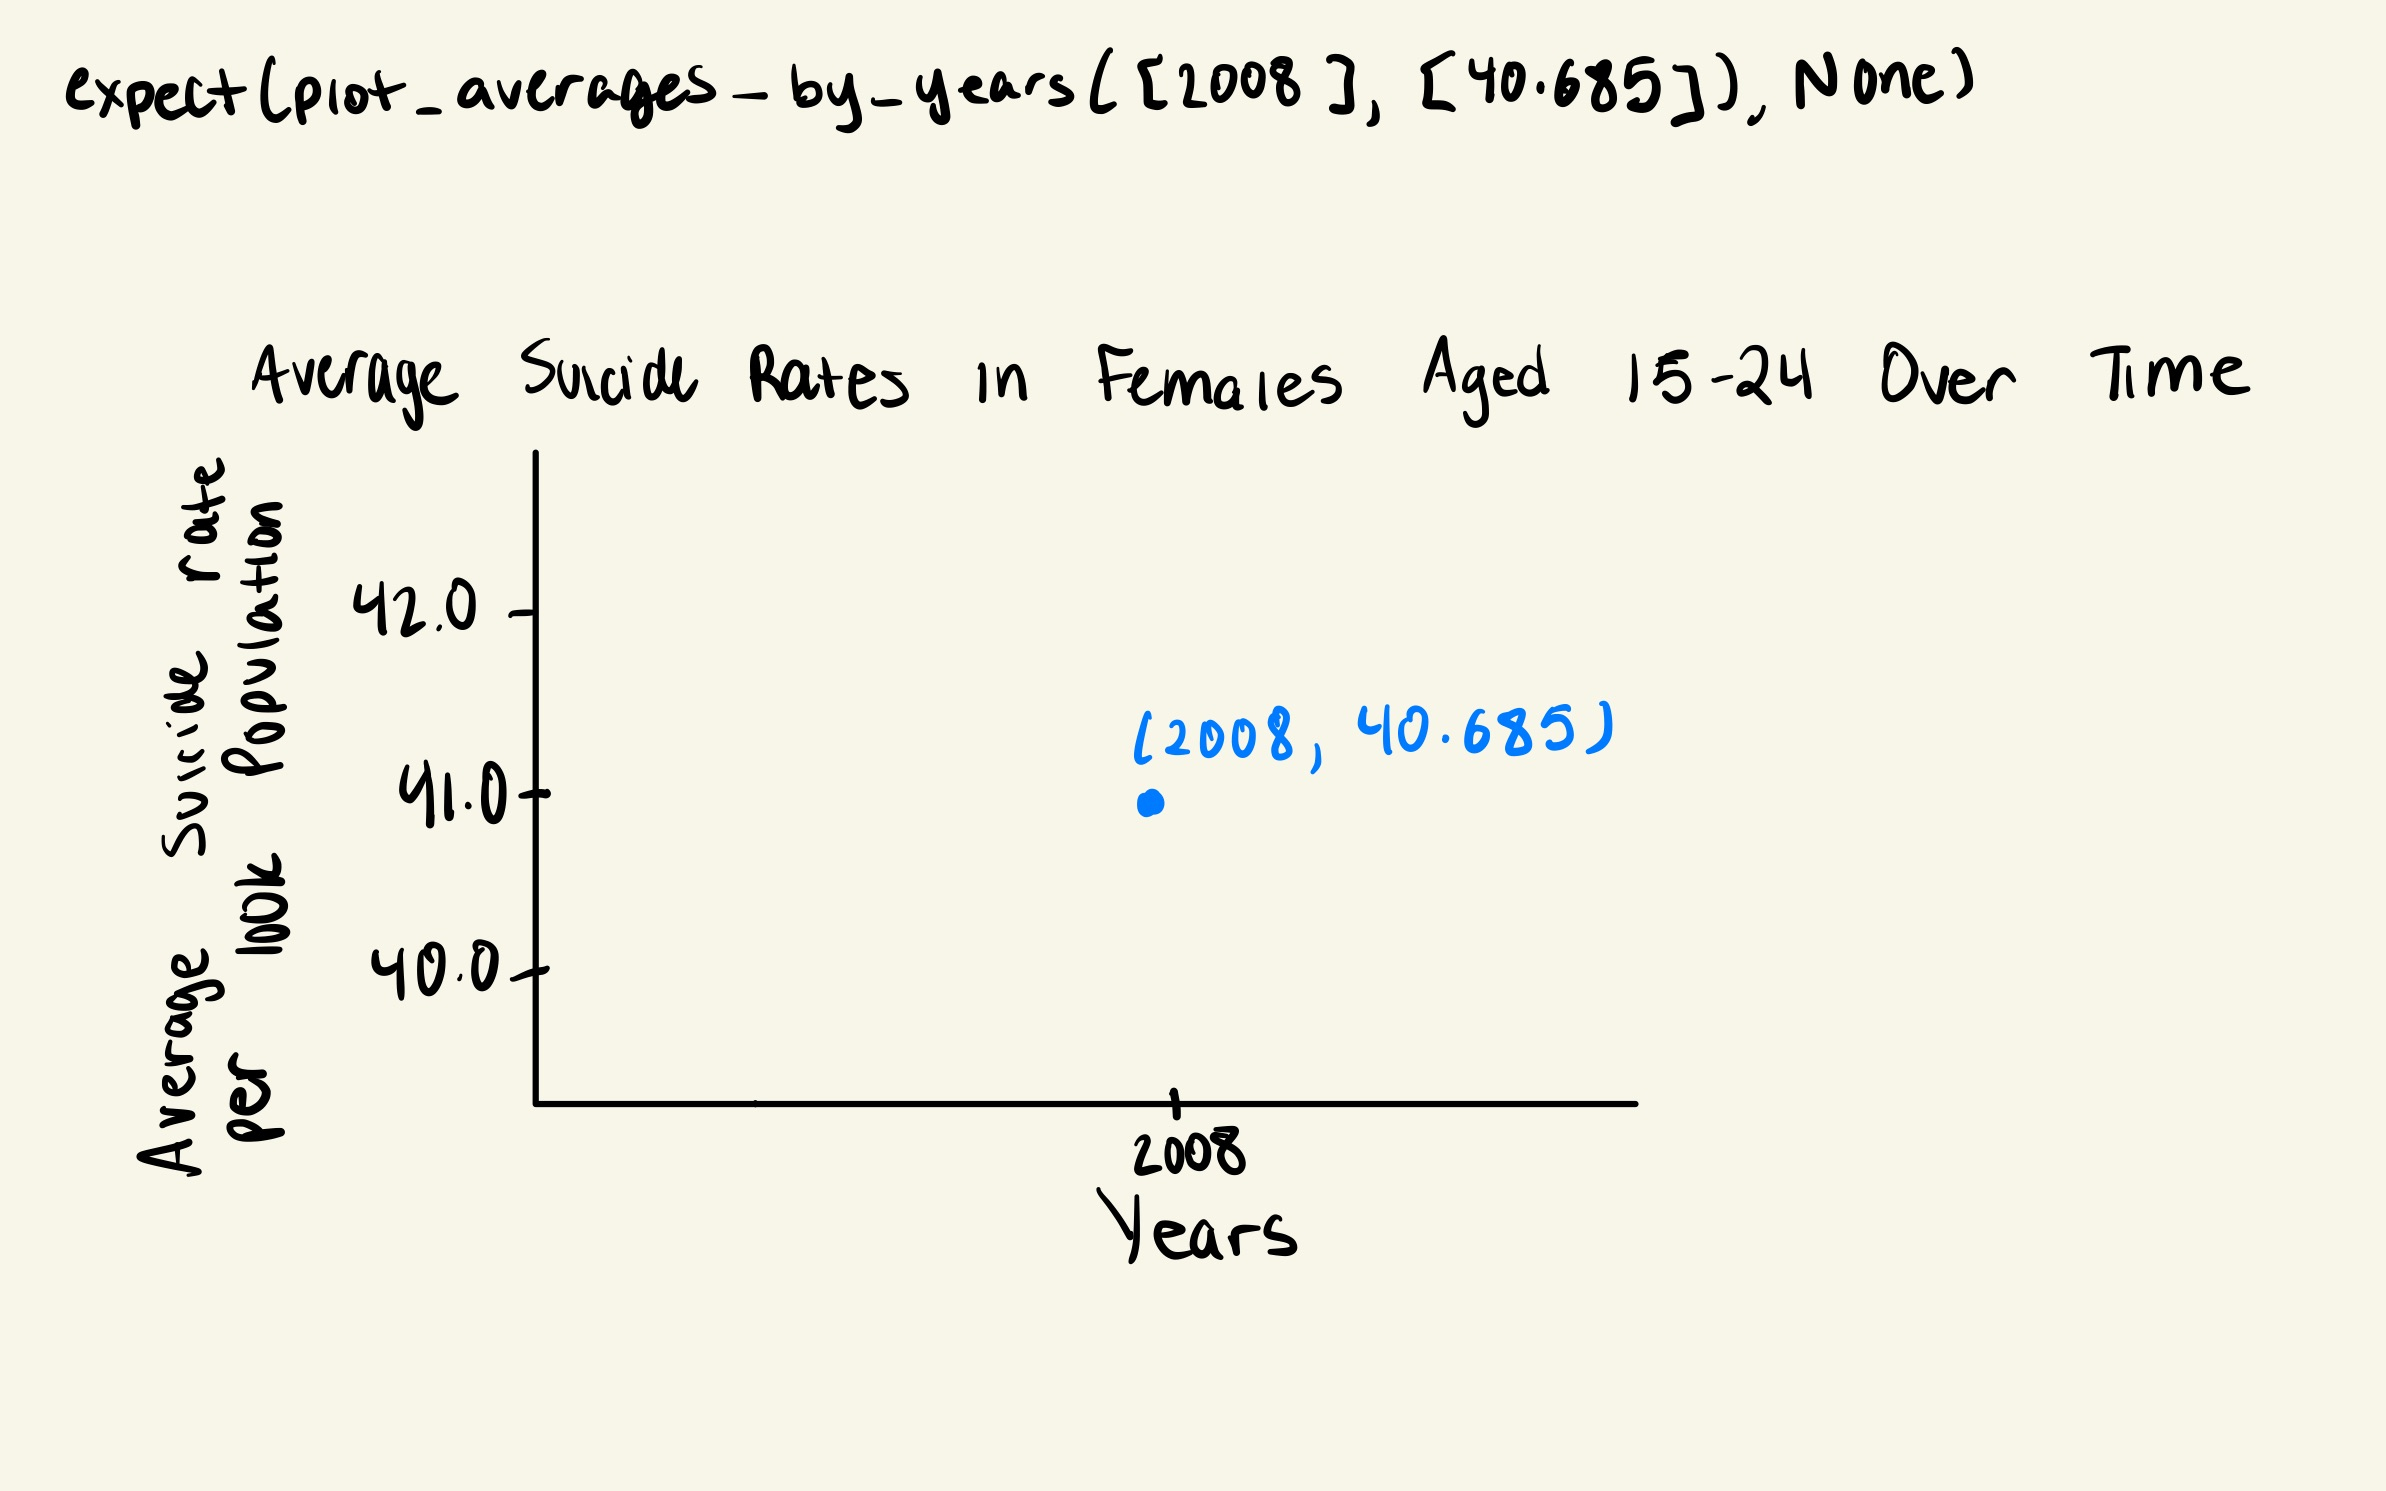
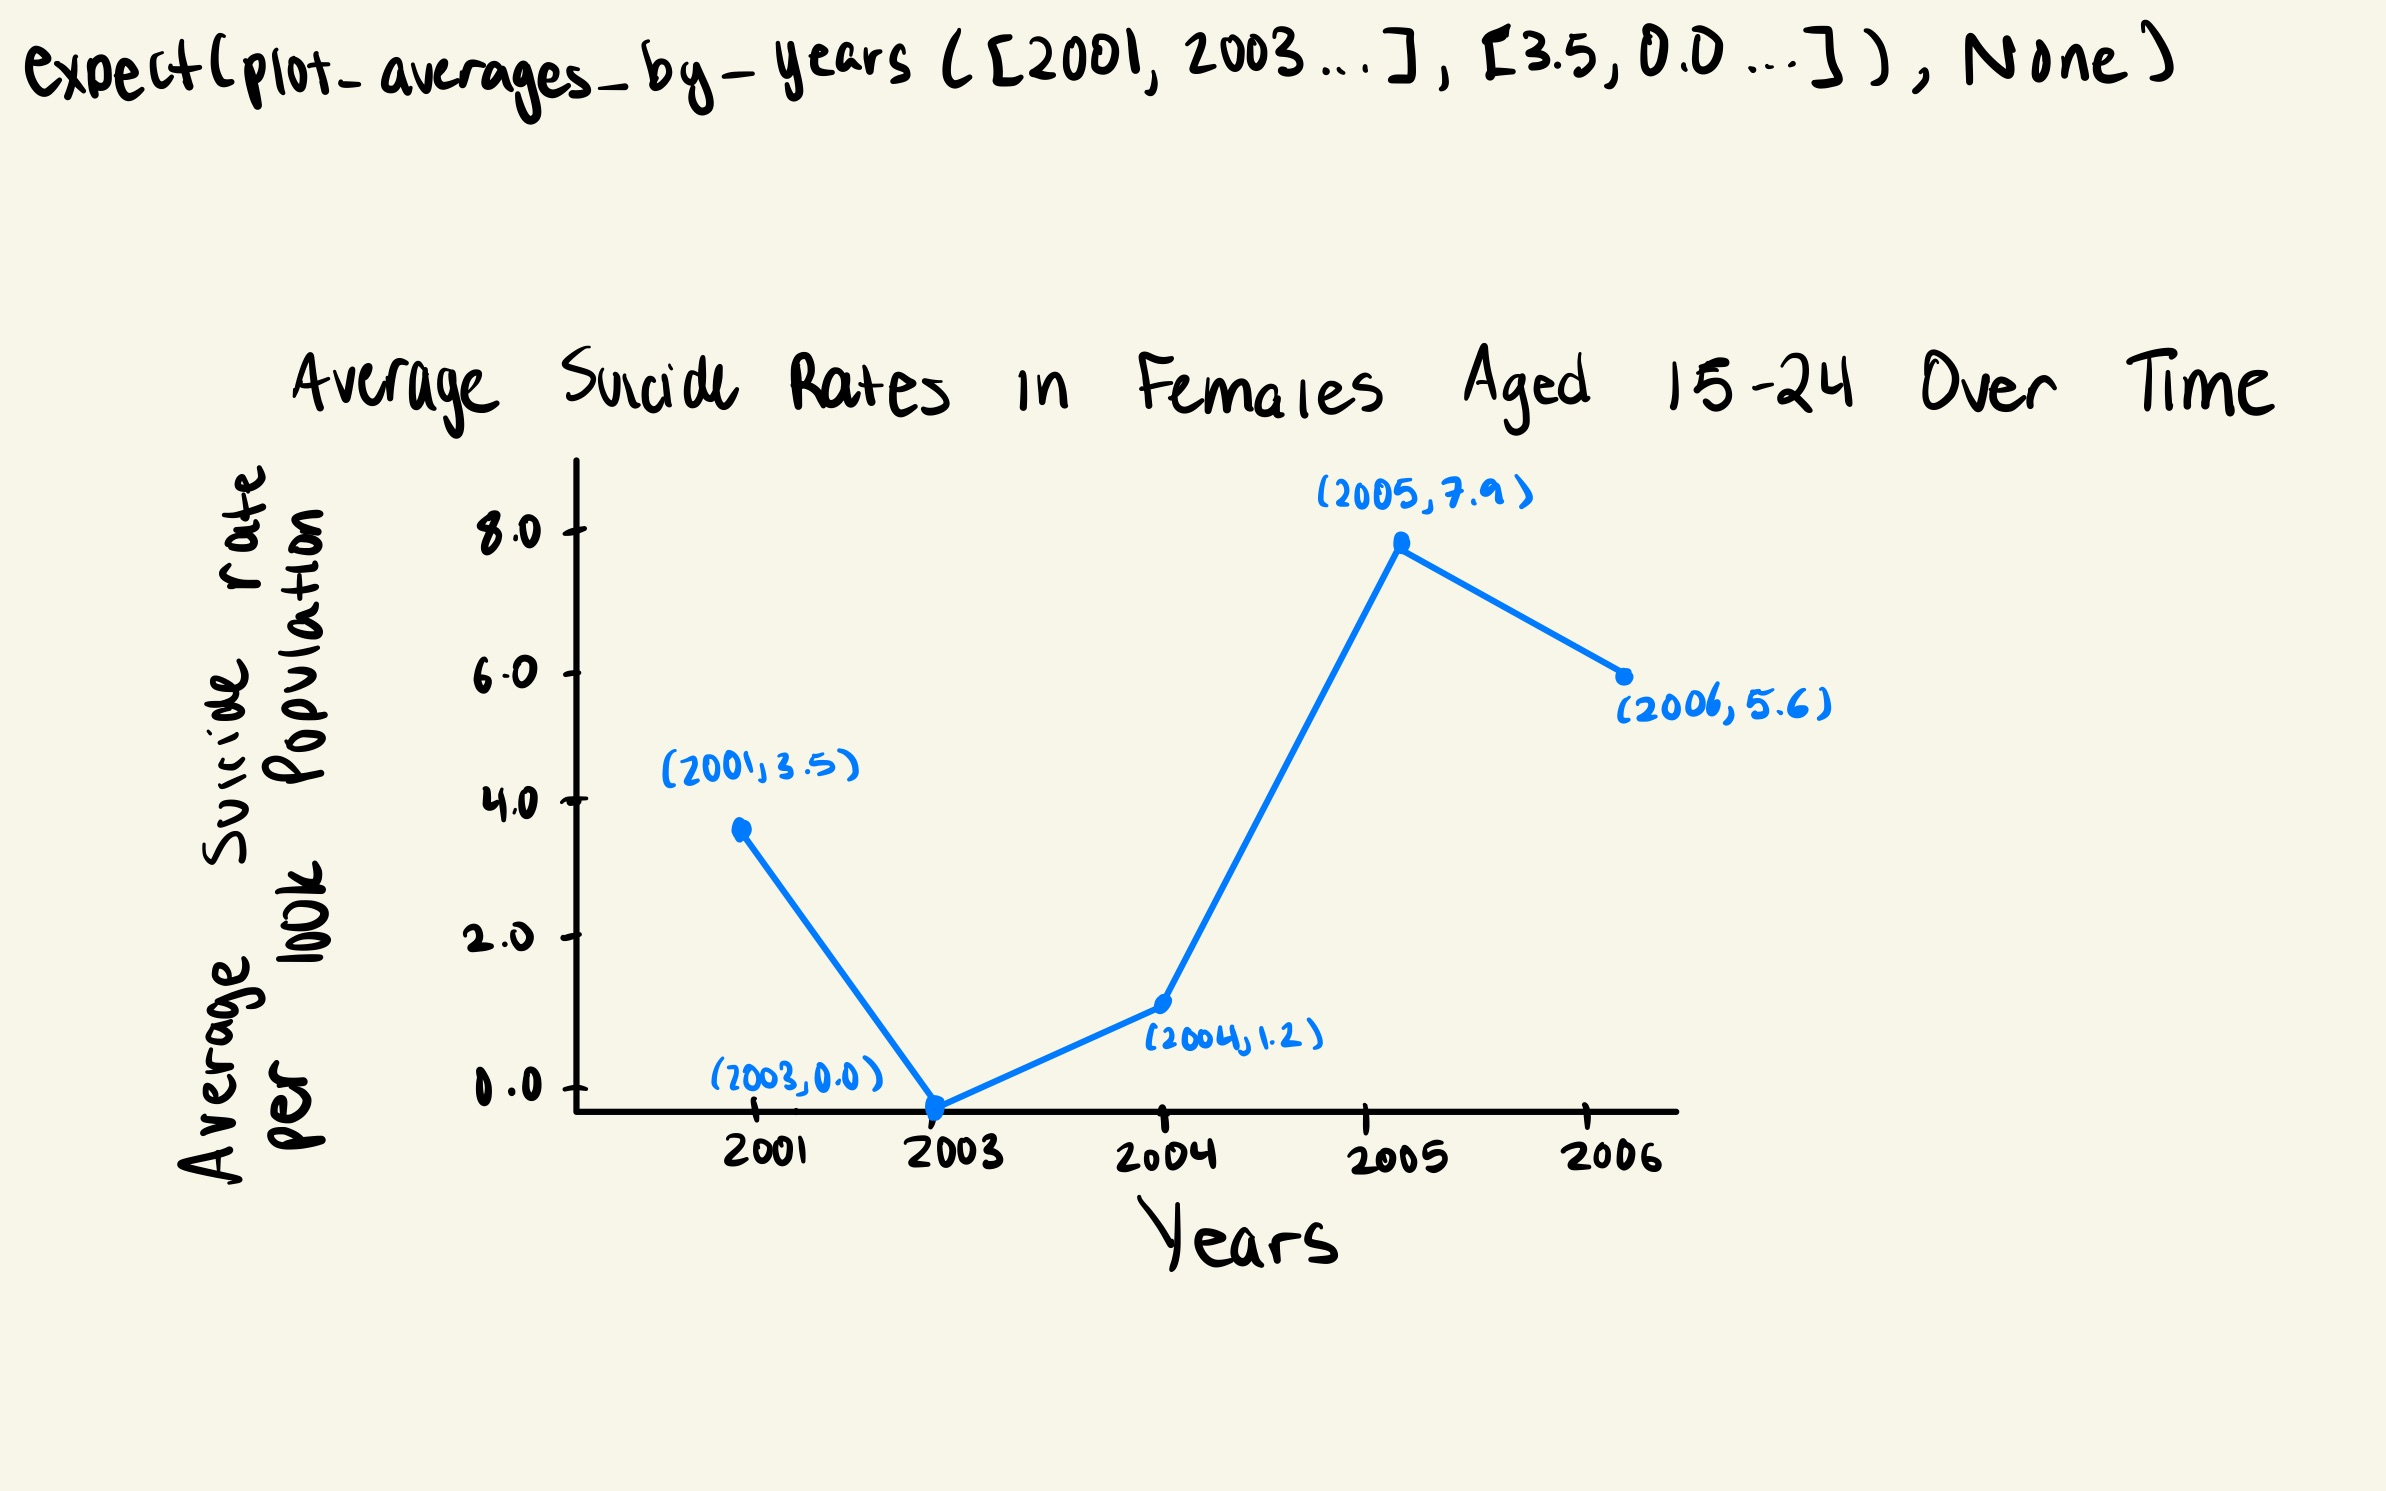